# Importing all the required libraries

In [8]:
# DATA HANDLING & MANIPULATION
import pandas as pd
import numpy as np
import datetime

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPROCESSING & TRANSFORMATION
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    PowerTransformer,
    FunctionTransformer,
    PolynomialFeatures
)

# DATA IMPUTATION (MISSING VALUE HANDLING)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import (
    SimpleImputer,
    KNNImputer,
    IterativeImputer
)


# DATA PIPELINES & TRANSFORMERS
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# MACHINE LEARNING MODELS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


# MODEL TRAINING, VALIDATION & HYPERPARAMETER TUNING
from sklearn.model_selection import (
    train_test_split,
    KFold,
    GridSearchCV,
    cross_validate
)

# MODEL EVALUATION METRICS
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)


# STATISTICAL FUNCTIONS
from scipy.stats import iqr


# MODEL PERSISTENCE
import joblib

# WARNINGS HANDLING
import warnings
warnings.filterwarnings('ignore')


# Load and Inspect Data

In [3]:
df = pd.read_csv('/content/AQI.csv')

In [4]:
df.drop(columns=['City' , 'AQI_Bucket' , 'Date'] , axis=1 , inplace=True)

In [5]:
# Removing all the empty rows
cols = ['AQI' , 'Xylene' , 'Toluene' , 'Benzene' , 'O3' , 'SO2' , 'CO' , 'NH3' , 'NOx' , 'NO2' , 'NO' , 'PM10' , 'PM2.5']
indices = df[df[cols].isnull().all(axis=1)].index

In [6]:
df.drop(indices , inplace=True)

In [ ]:
df.shape

(28157, 14)

In [ ]:
df.isnull().sum() # Check if features in the dataset have null values or not

Date           0
PM2.5       3224
PM10        9766
NO          2208
NO2         2211
NOx         2811
NH3         8954
CO           685
SO2         2480
O3          2648
Benzene     4249
Toluene     6667
Xylene     16735
AQI         3307
dtype: int64

In [ ]:
df.head() # Top 5 rows of the dataset

Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
0  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64  133.36   
1  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   34.06   
2  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   30.70   
3  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   36.08   
4  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   39.31   

   Benzene  Toluene  Xylene  AQI  
0     0.00     0.02    0.00  NaN  
1     3.68     5.50    3.77  NaN  
2     6.80    16.40    2.25  NaN  
3     4.43    10.14    1.00  NaN  
4     7.01    18.89    2.78  NaN

In [ ]:
df.sample(5) # Random 5 rows from the dataset

Date   PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2  \
24020  2015-11-04  124.45     NaN  33.08  26.49  59.63    NaN  1.42   7.60   
16817  2018-01-30   99.61  255.39  38.71  42.64  67.01  35.15  1.36  17.40   
21048  2018-04-17  120.71     NaN  21.96  59.62  51.87  30.22  0.43  12.56   
23237  2018-10-14   48.18  166.65  43.01  30.08  73.09    NaN  2.18  18.99   
26665  2019-09-14   25.07   68.49  22.30   9.61  30.88   7.39  1.39   8.71   

          O3  Benzene  Toluene  Xylene    AQI  
24020   7.97     0.29     1.56    0.61  270.0  
16817  40.81     2.69     7.15     NaN  219.0  
21048  36.52     0.00     0.00     NaN  240.0  
23237  49.91     2.47      NaN     NaN  149.0  
26665   1.52     1.15      NaN     NaN   75.0

In [ ]:
df.info() # information about the data type

<class 'pandas.core.frame.DataFrame'>
Index: 28157 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     28157 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 4.2+ MB


In [ ]:
df.describe().T # stats related to numerical features

count        mean         std    min     25%     50%       75%  \
PM2.5    24933.0   67.450578   64.661449   0.04  28.820   48.57   80.5900   
PM10     18391.0  118.127103   90.605110   0.01  56.255   95.68  149.7450   
NO       25949.0   17.574730   22.785846   0.02   5.630    9.89   19.9500   
NO2      25946.0   28.560659   24.474746   0.01  11.750   21.69   37.6200   
NOx      25346.0   32.309123   31.646011   0.00  12.820   23.52   40.1275   
NH3      19203.0   23.483476   25.684275   0.01   8.580   15.85   30.0200   
CO       27472.0    2.248598    6.962884   0.00   0.510    0.89    1.4500   
SO2      25677.0   14.531977   18.133775   0.01   5.670    9.16   15.2200   
O3       25509.0   34.491430   21.694928   0.01  18.860   30.84   45.5700   
Benzene  23908.0    3.280840   15.811136   0.00   0.120    1.07    3.0800   
Toluene  21490.0    8.700972   19.969164   0.00   0.600    2.97    9.1500   
Xylene   11422.0    3.070128    6.323247   0.00   0.140    0.98    3.3500   
AQI      24850.0  166.463581  140.696585  13.00  81.000  118.00  208.0000   

             max  
PM2.5     949.99  
PM10     1000.00  
NO        390.68  
NO2       362.21  
NOx       467.63  
NH3       352.89  
CO        175.81  
SO2       193.86  
O3        257.73  
Benzene   455.03  
Toluene   454.85  
Xylene    170.37  
AQI      2049.00

In [ ]:
# Seprate numerical columns and categorical columns
numerical_cols = []
categorical_cols = []

for col in df.columns:
  if df[col].dtype == 'object':
    categorical_cols.append(col)
  else:
    numerical_cols.append(col)

# EDA

## Univariate Analysis

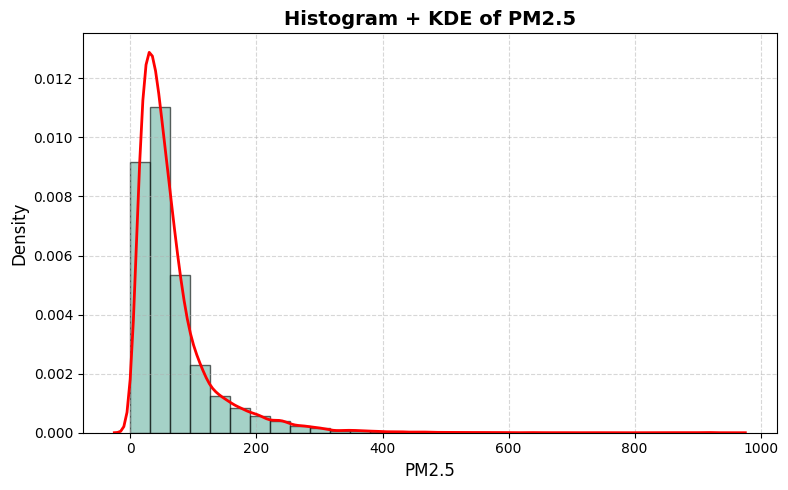

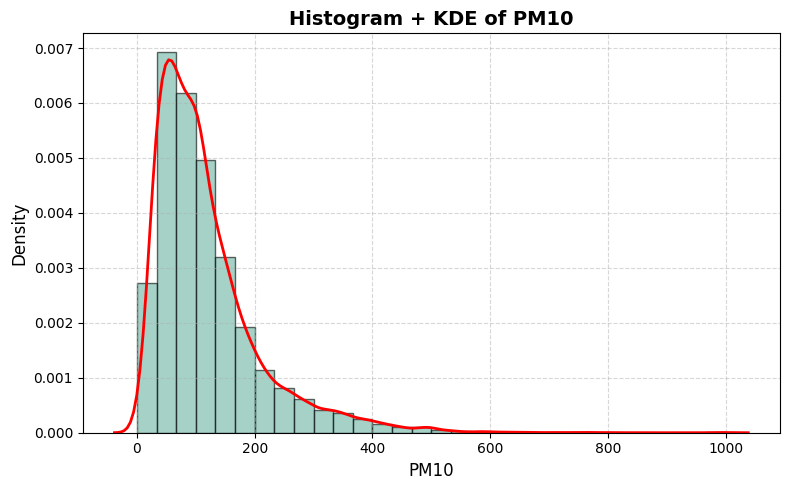

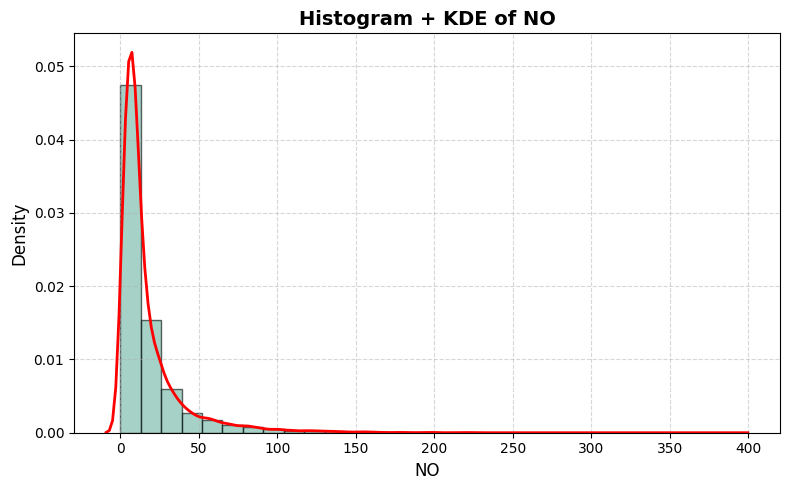

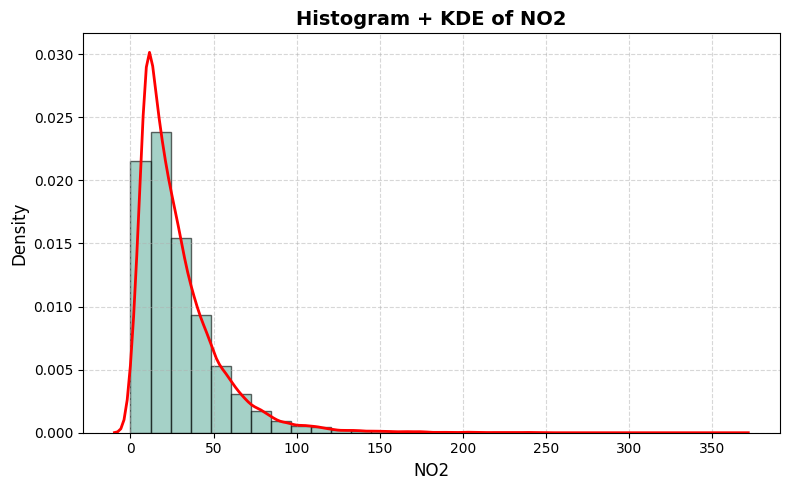

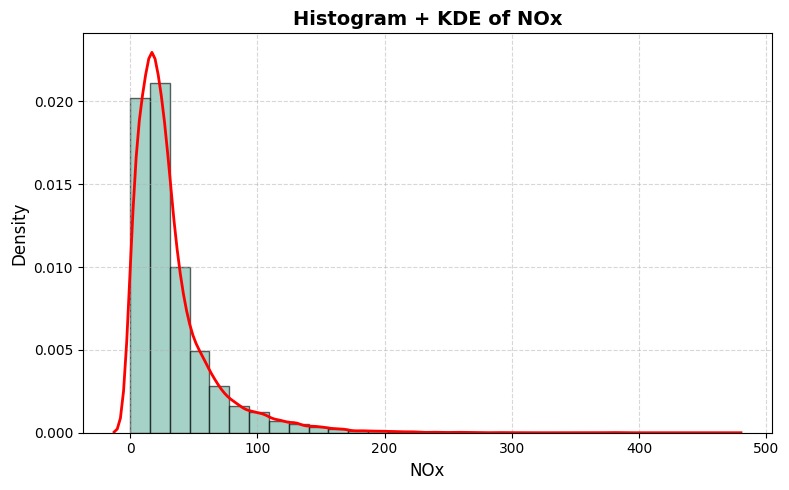

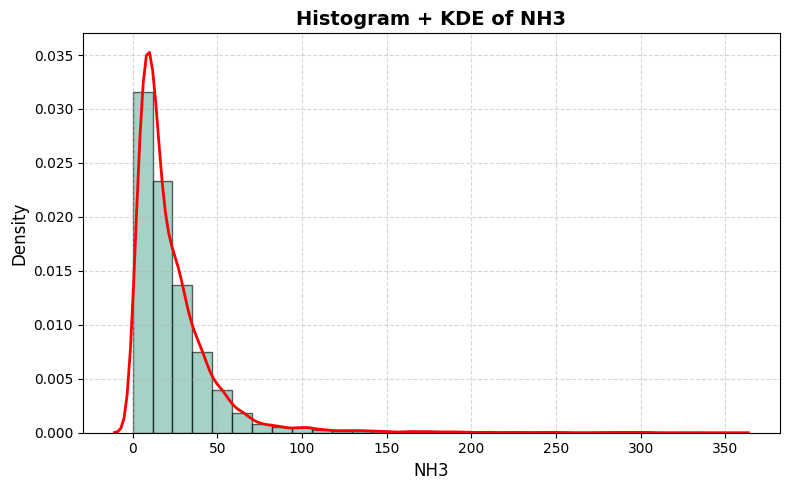

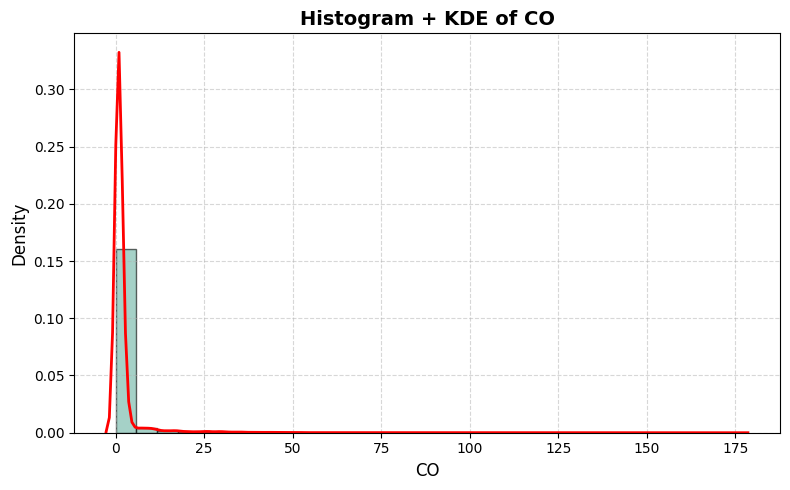

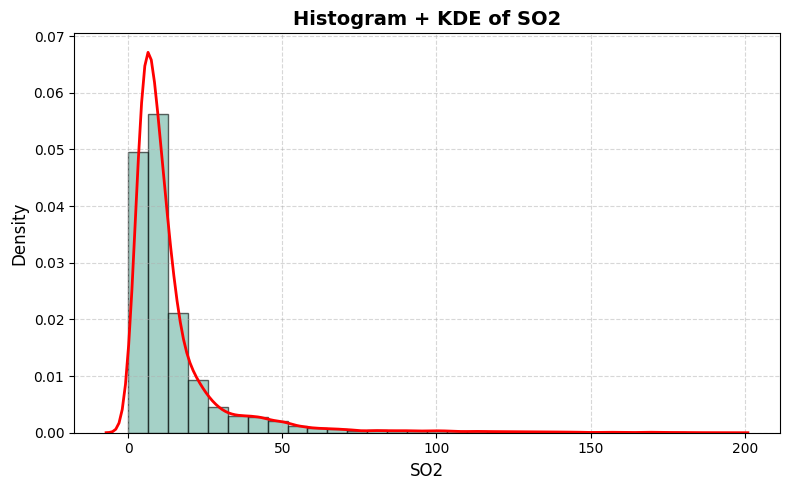

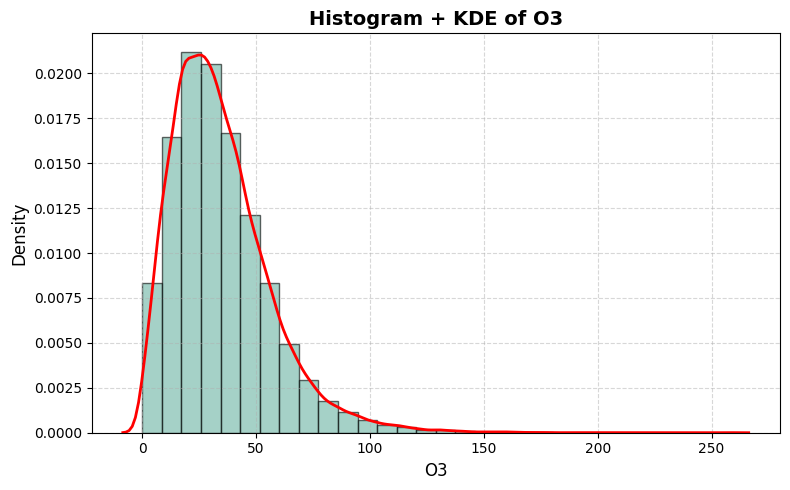

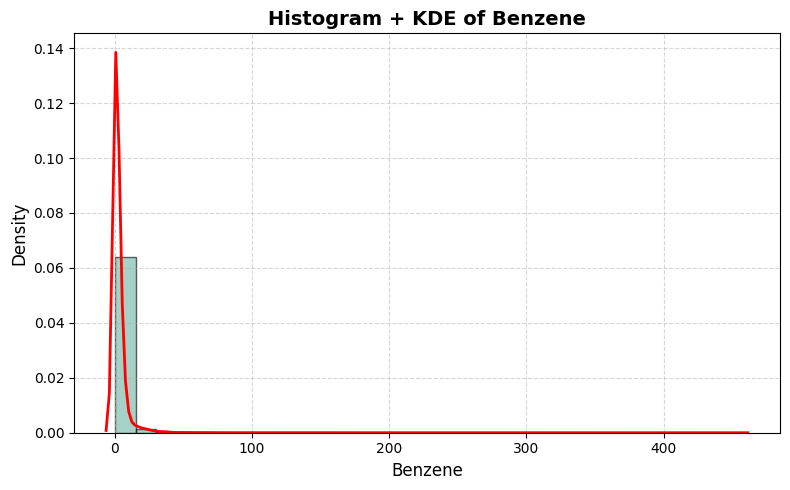

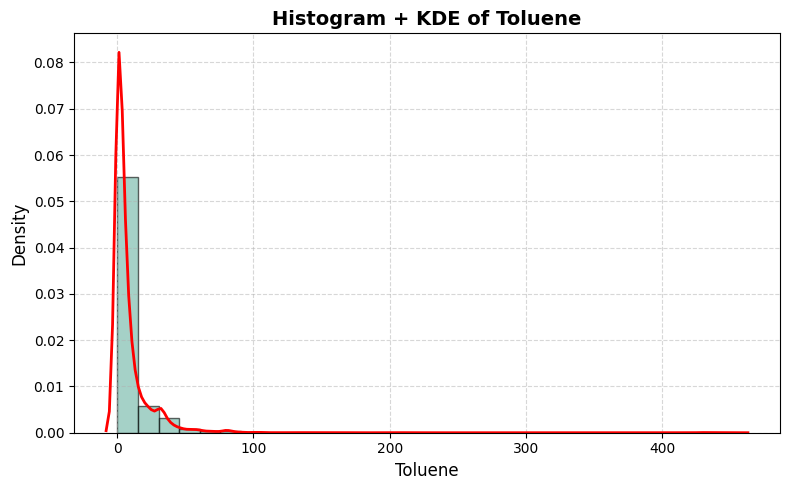

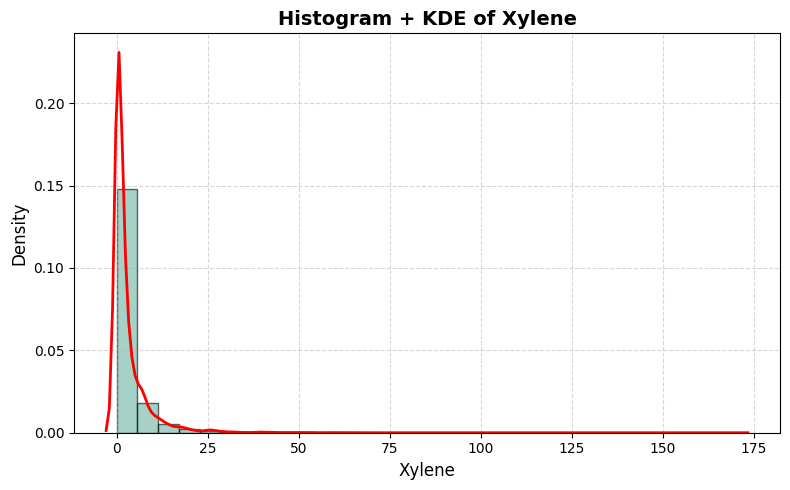

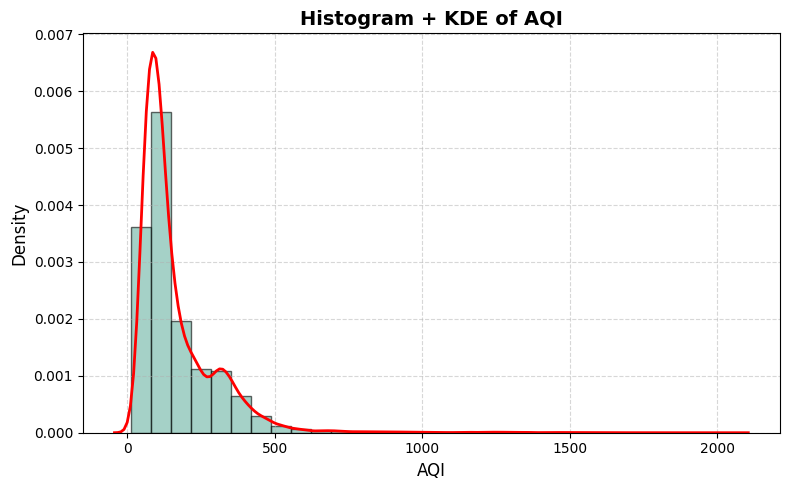

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))

    # Plot histogram (density=True scales it for KDE overlay)
    plt.hist(df[col].dropna(), bins=30, density=True,
             alpha=0.6, color='#69b3a2', edgecolor='black')

    # Overlay KDE plot
    sns.kdeplot(df[col].dropna(), color='red', linewidth=2, bw_adjust=1)

    # Titles and labels
    plt.title(f'Histogram + KDE of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)  # use Density, not Frequency, since scaled

    # Grid
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

* Most pollutant values (like SO₂, PM2.5, PM10, NO, NO₂, NOx, NH₃, CO, O₃, and Benzene) are not evenly spread.
* Most of the time, the pollution levels are low or normal, but sometimes they suddenly rise to very high levels.
* To make the data easier for models to understand, we can use scaling or transformation before training.


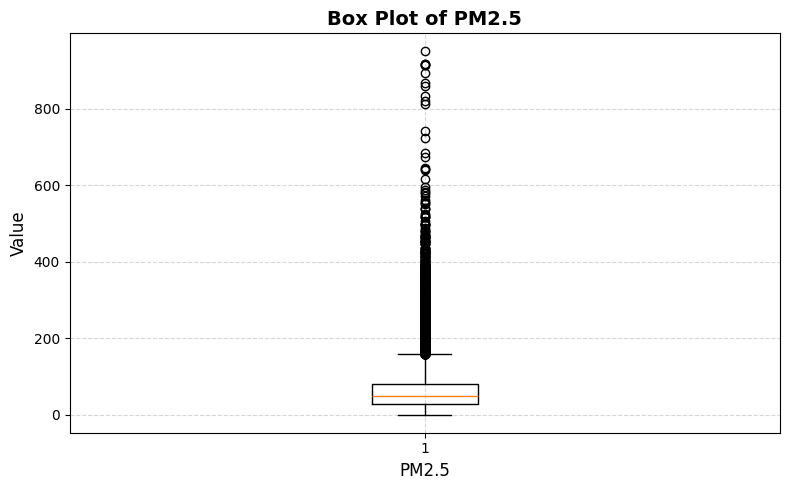

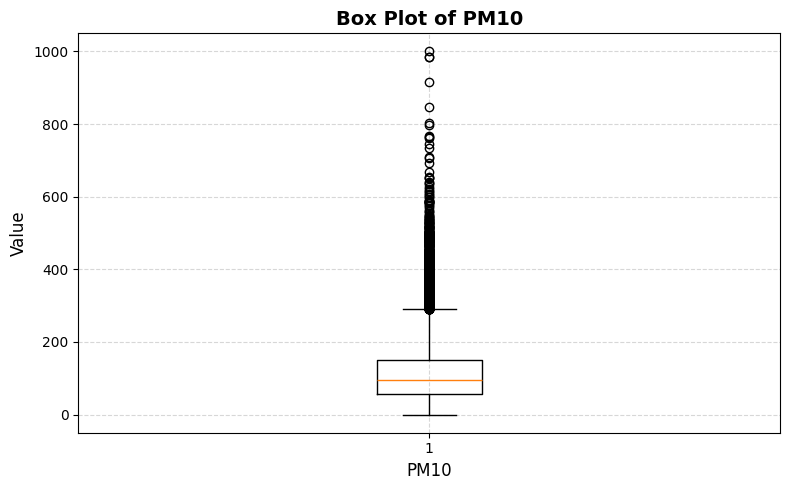

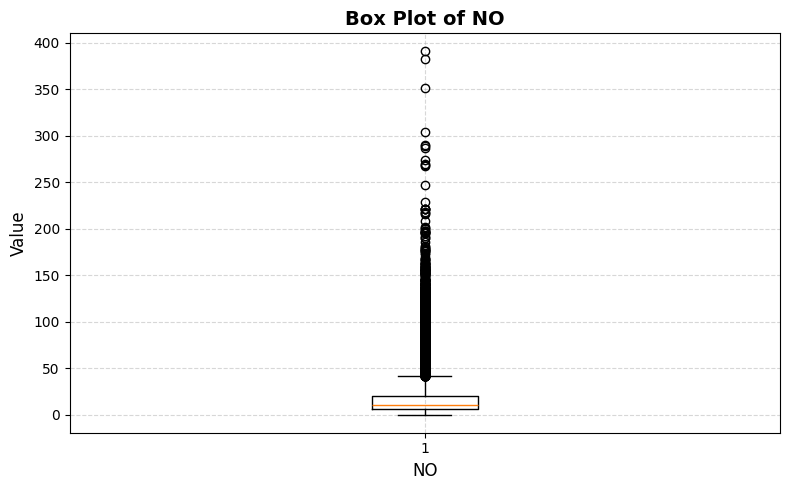

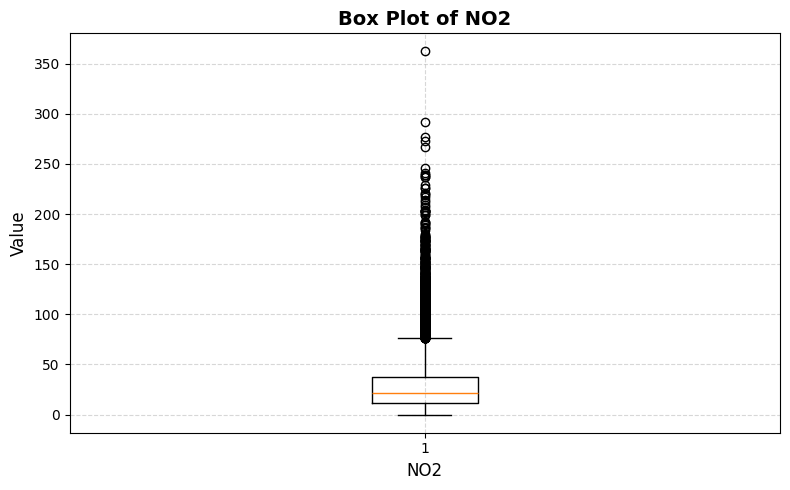

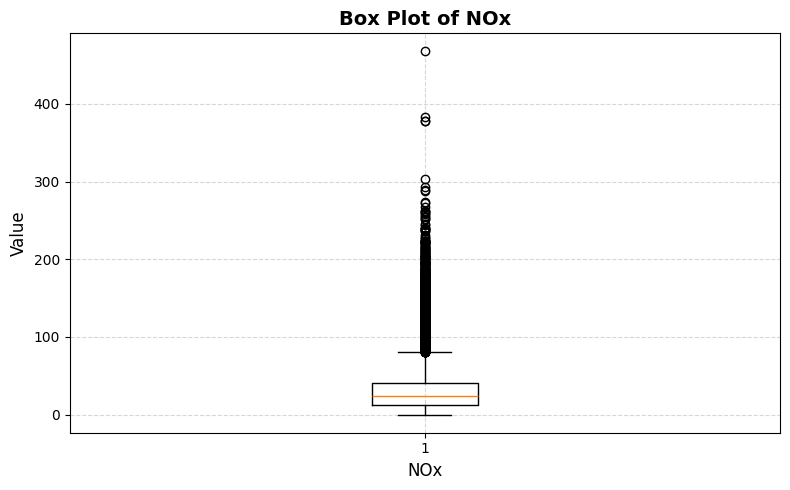

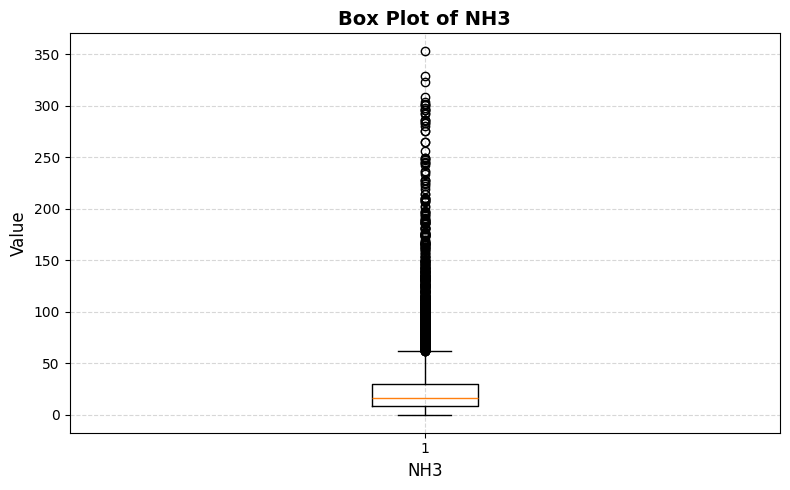

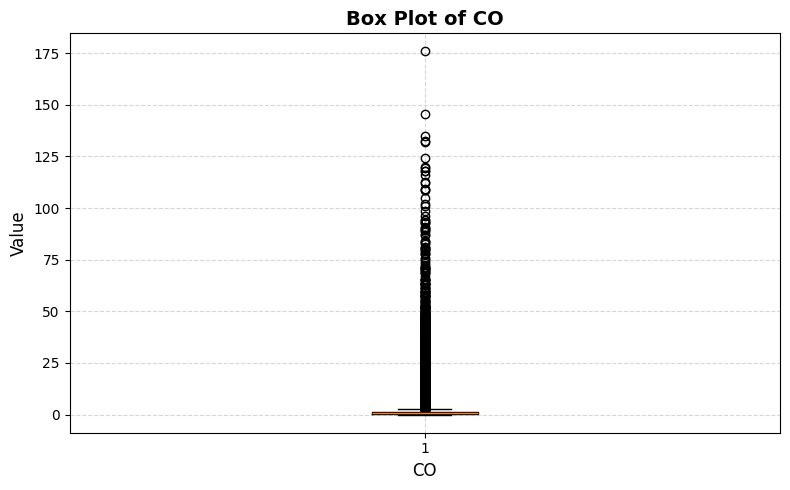

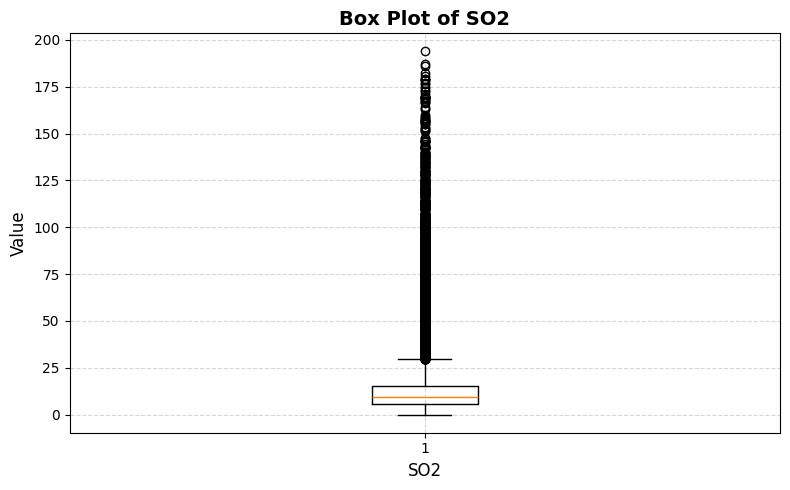

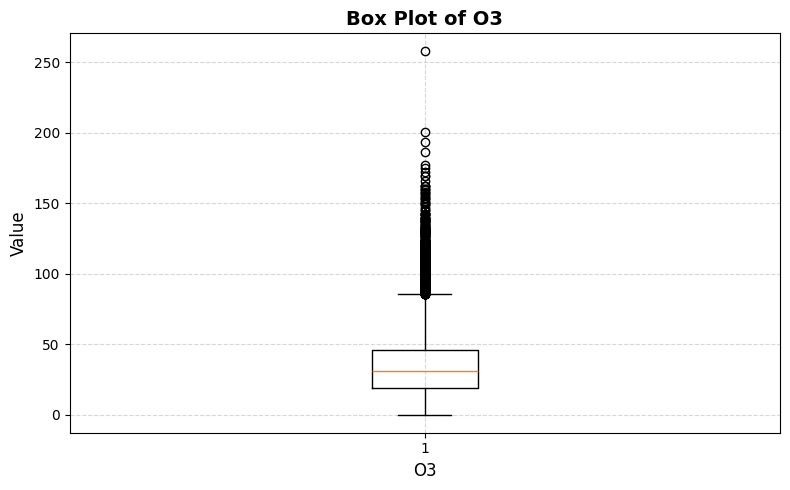

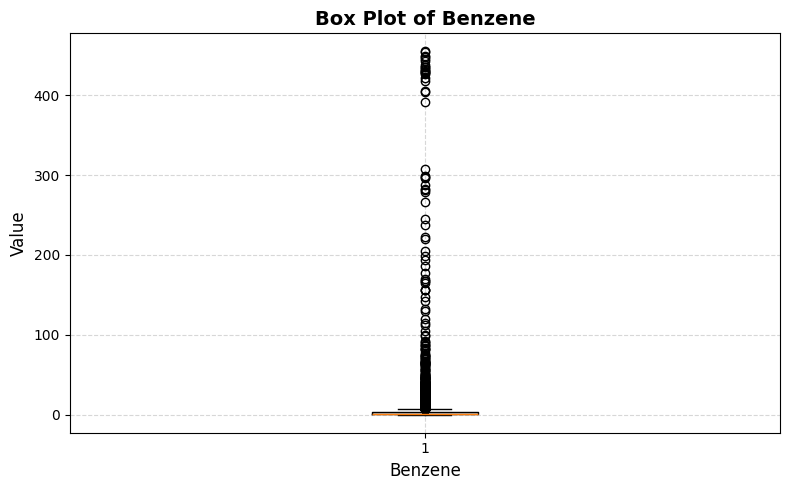

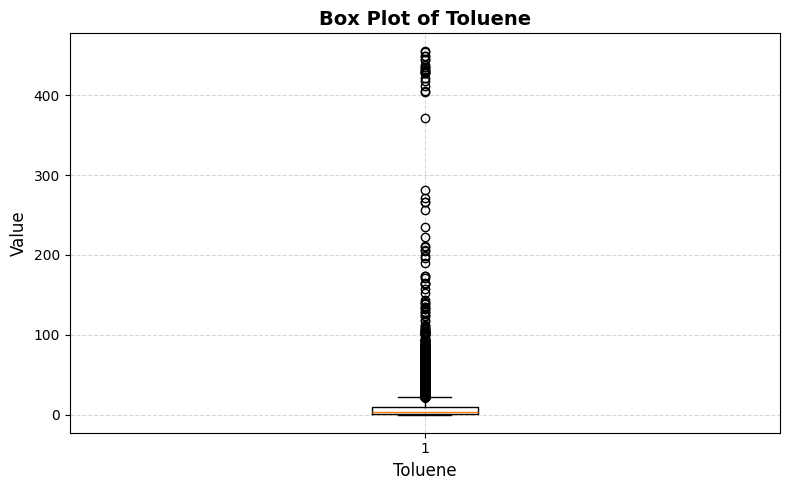

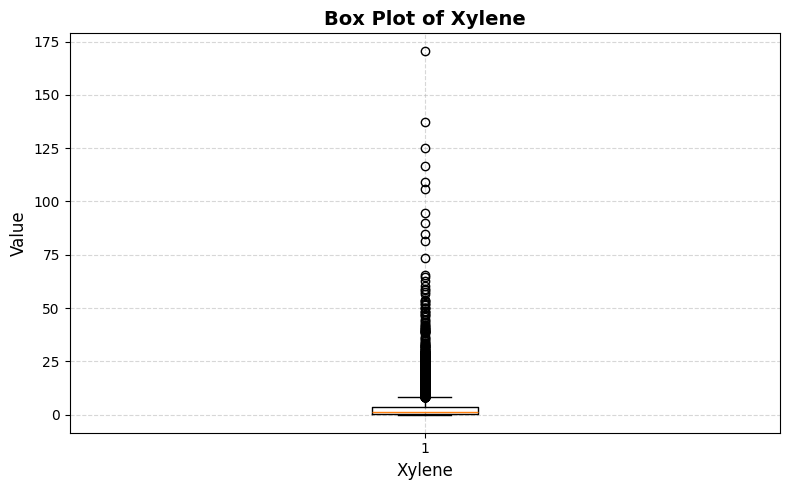

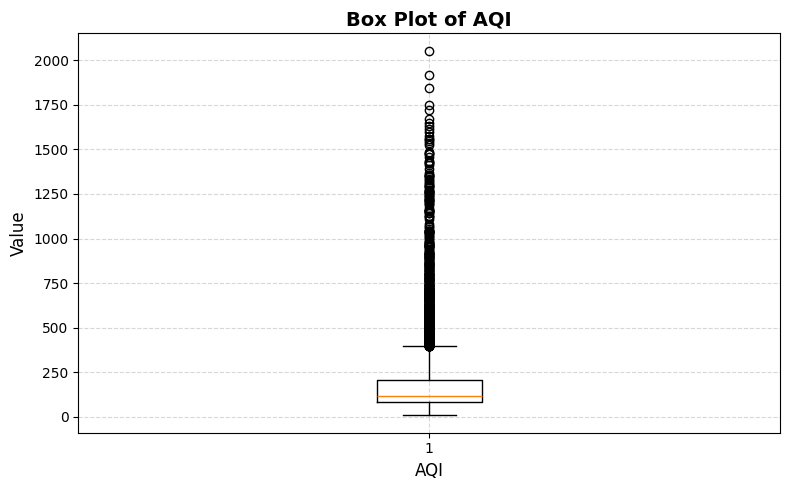

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))

    # PLotting boxplot for all the features to check outliers
    plt.boxplot(df[col].dropna())

    # Titles and labels
    plt.title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


- All the features in the dataset have lot of outliers
- Removing all the outlier may not be the efficient because due to this lot of data will get drop.
- So, instead of droping , capping will be the best way to deal outliers.

## Bivariate Analysis

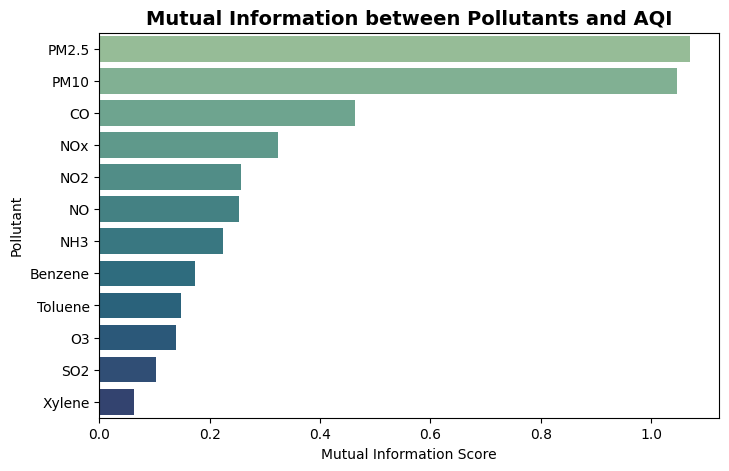

In [ ]:
# listing all the pollutants in the dataset
pollutants = [
    "PM2.5",
    "PM10",
    "NO",
    "NO2",
    "NOx",
    "NH3",
    "CO",
    "SO2",
    "O3",
    "Benzene",
    "Toluene",
    "Xylene"
]

# PLotting a mutual information plot which use non-linear pattern to find which features have high importance to achive target
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(df.dropna()[pollutants], df.dropna()['AQI'])
mi_series = pd.Series(mi, index=pollutants).sort_values(ascending=False)

plt.figure(figsize=(8,5))
# plotting bar plot accoring to importance of features
sns.barplot(x=mi_series, y=mi_series.index, palette="crest")

plt.title("Mutual Information between Pollutants and AQI", fontsize=14, fontweight='bold')
plt.xlabel("Mutual Information Score")
plt.ylabel("Pollutant")

plt.show()

- PM2.5 and PM10 are the dominant drivers of AQI changes.

- CO and NOx have moderate influence, suggesting they are secondary pollutants affecting AQI.

- Other pollutants (e.g., O₃, SO₂, Xylene) contribute less significantly to AQI variability.

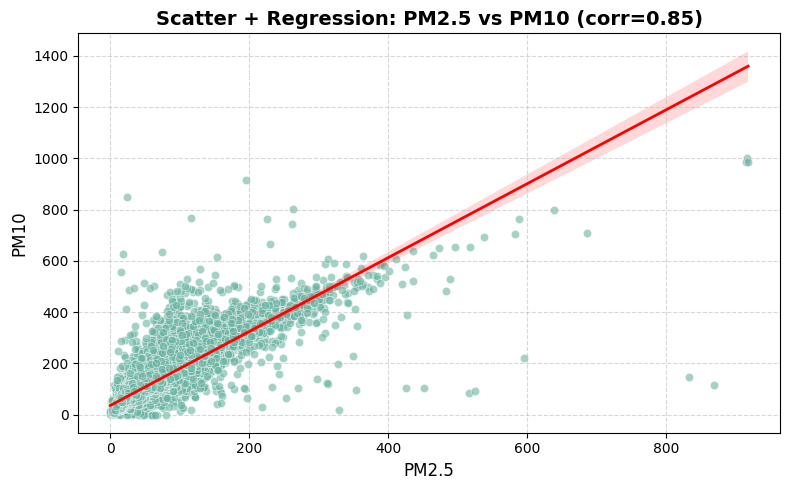

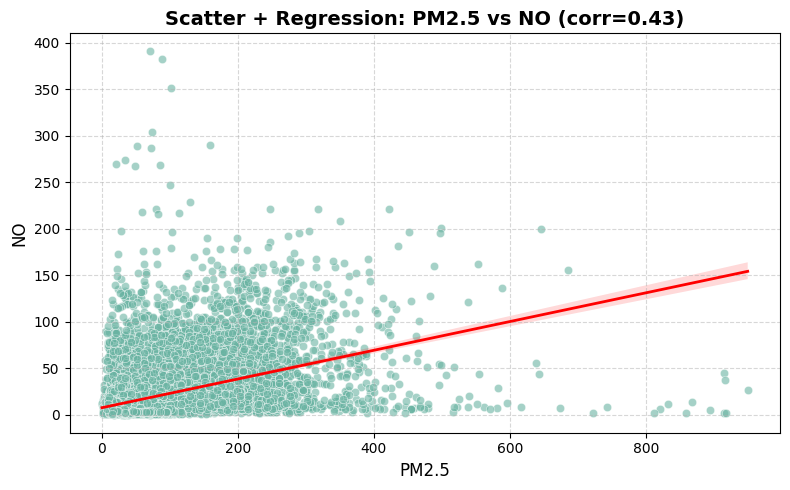

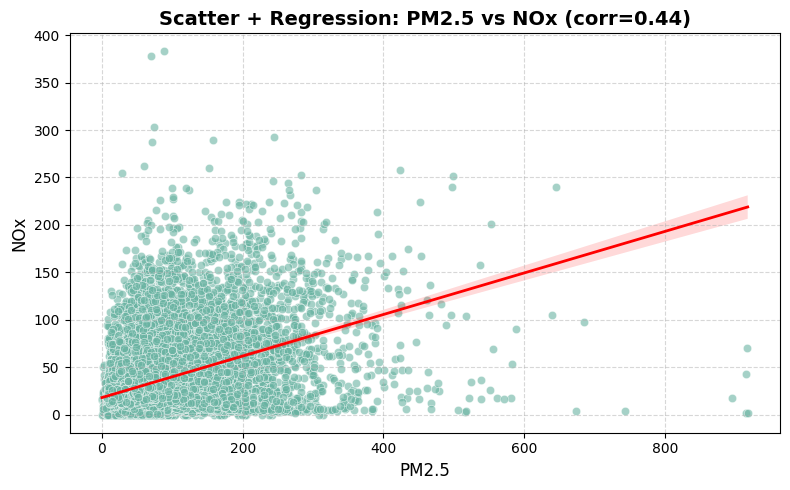

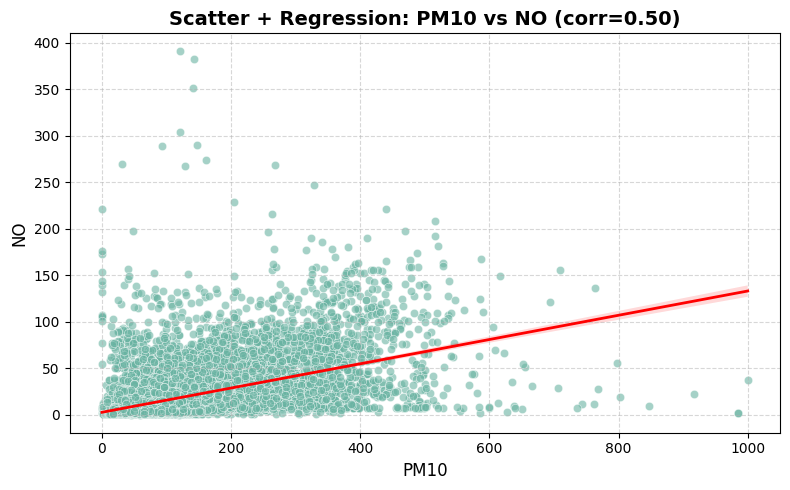

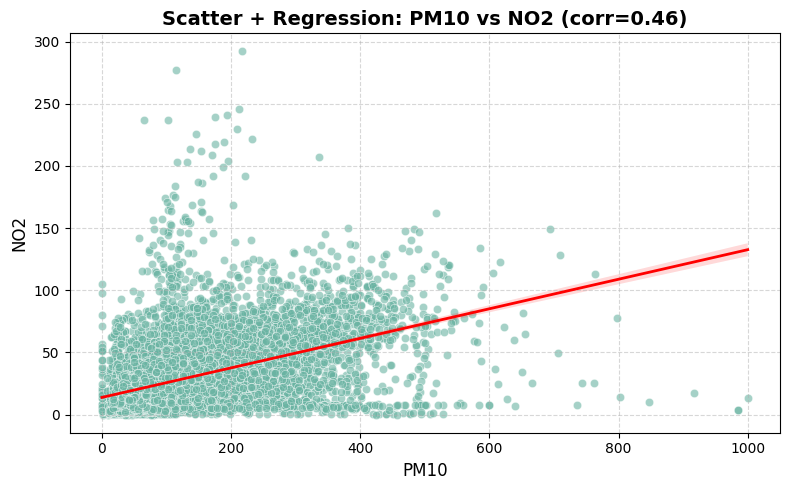

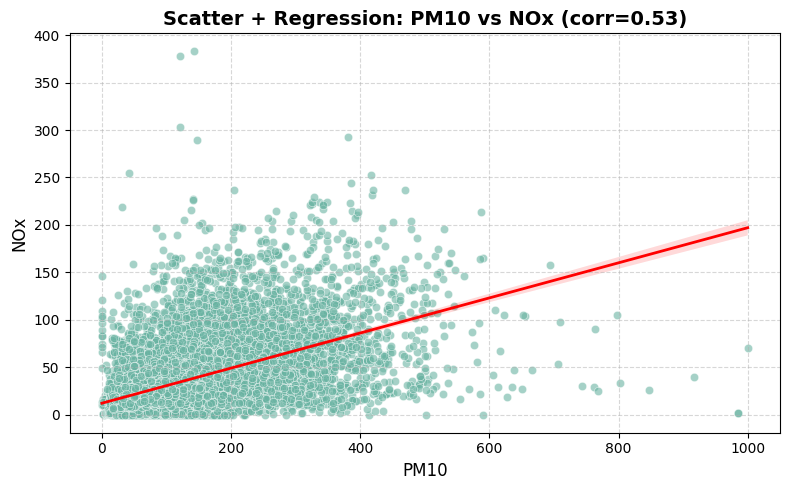

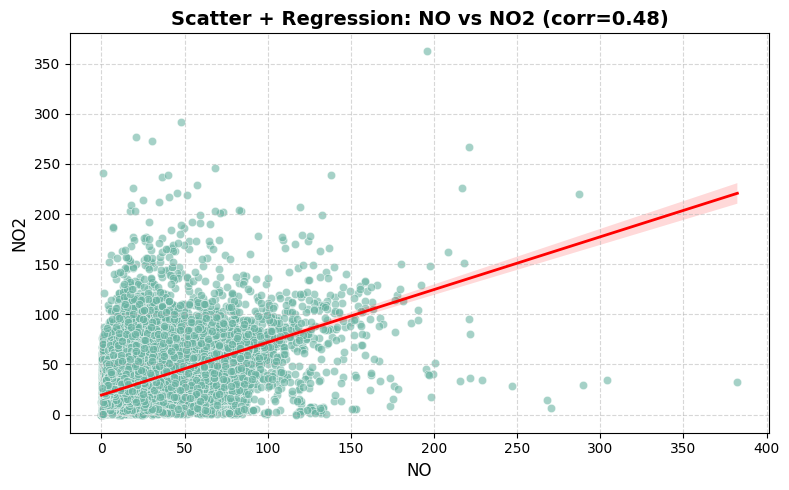

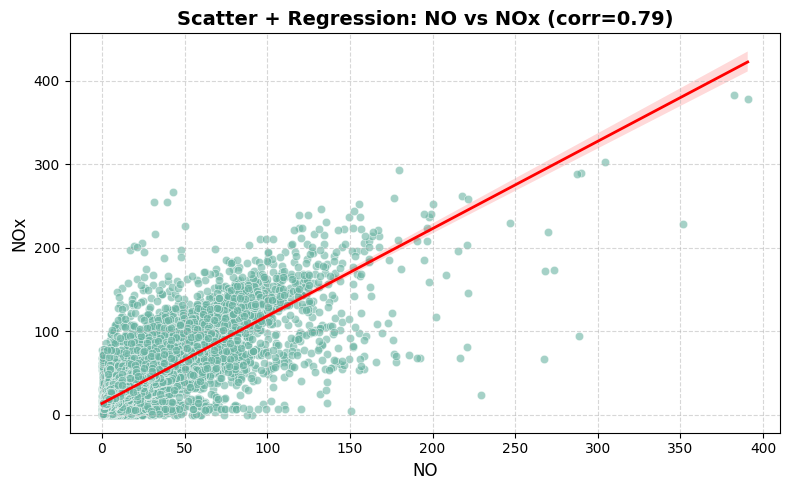

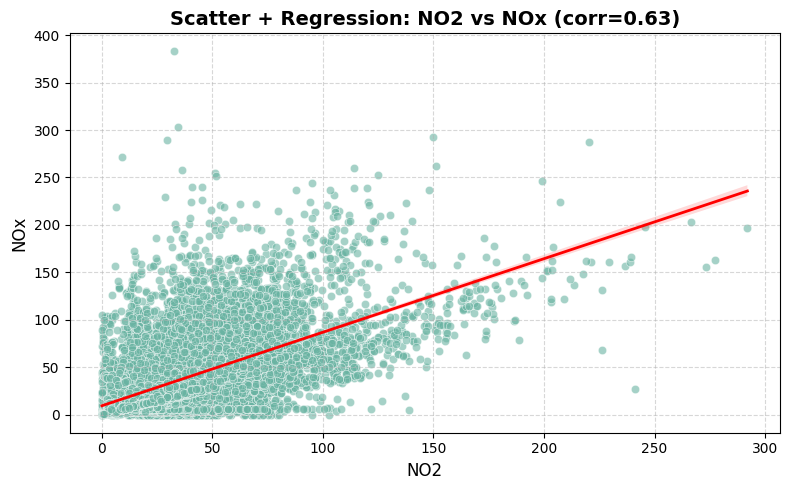

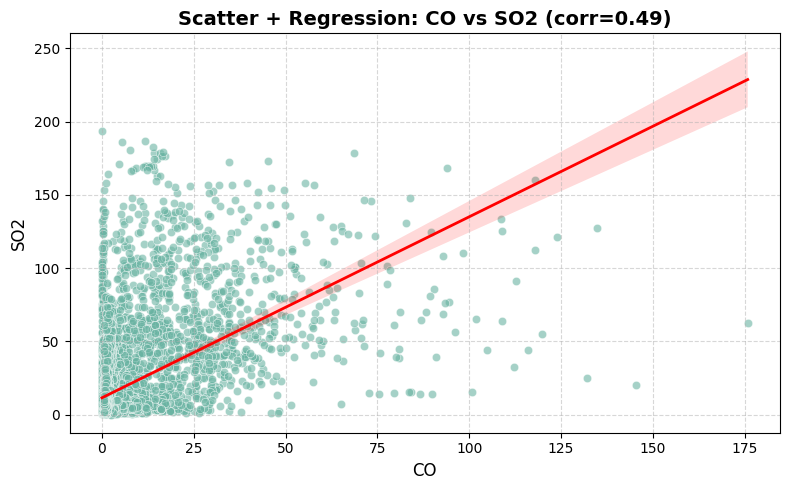

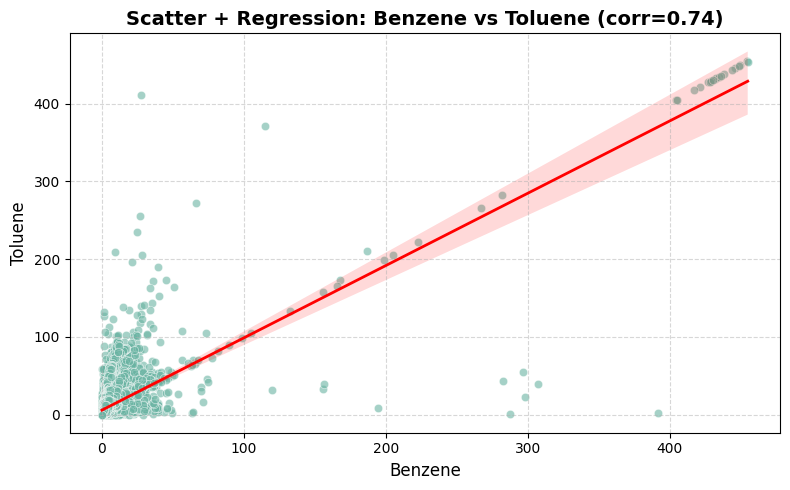

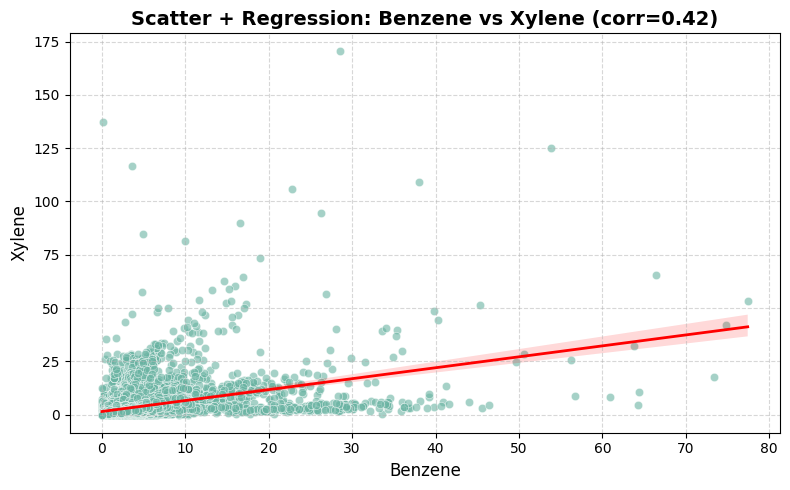

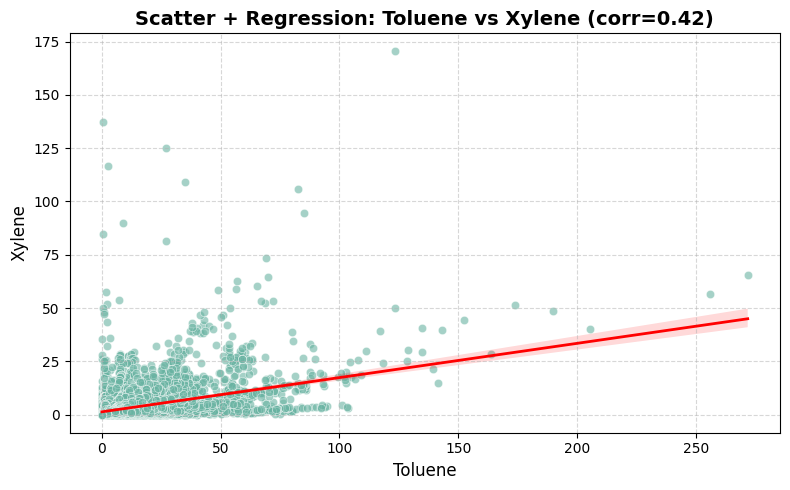

In [ ]:
import itertools

# Find the correlation of numerical columns
corr_matrix = df[pollutants].corr()

# Threshold for “relatedness”
threshold = 0.4

# Find all possible pairs among the features present in dataset
pairs = list(itertools.combinations(pollutants, 2))

for x_col, y_col in pairs:
    corr_value = corr_matrix.loc[x_col, y_col]
    if abs(corr_value) >= threshold:  # only plot if correlated enough
        plt.figure(figsize=(8,5))

        # Plotting scatter plot
        sns.scatterplot(x=x_col, y=y_col, data=df, alpha=0.6, color='#69b3a2')

        # Plotting a regplot which fit the best fit line
        sns.regplot(x=x_col, y=y_col, data=df, scatter=False, color='red', line_kws={'linewidth':2})

        plt.title(f'Scatter + Regression: {x_col} vs {y_col} (corr={corr_value:.2f})', fontsize=14, fontweight='bold')
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel(y_col, fontsize=12)

        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

- PM2.5 and PM10 dominate particulate pollution patterns and move almost in sync, indicating high linear dependence.

- Nitrogen-based pollutants (NO, NO₂, NOₓ) form a tightly linked cluster due to shared combustion sources.

- The strong interdependence among pollutants reveals multicollinearity, suggesting the need for Ridge regularization to stabilize regression coefficients.

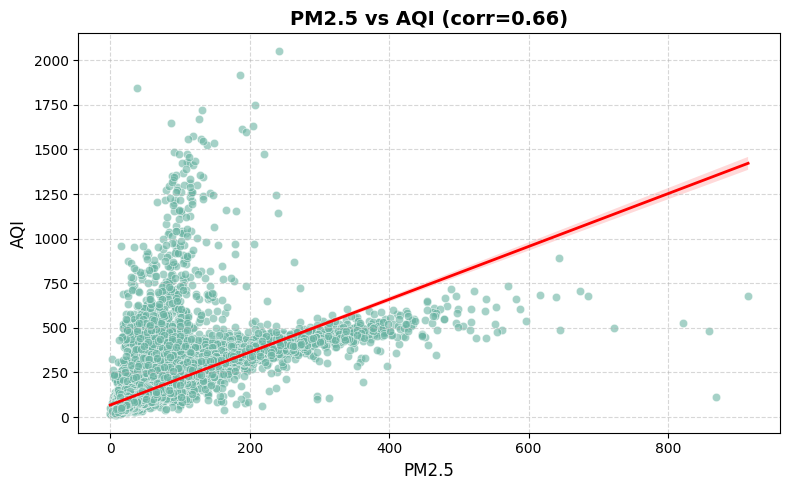

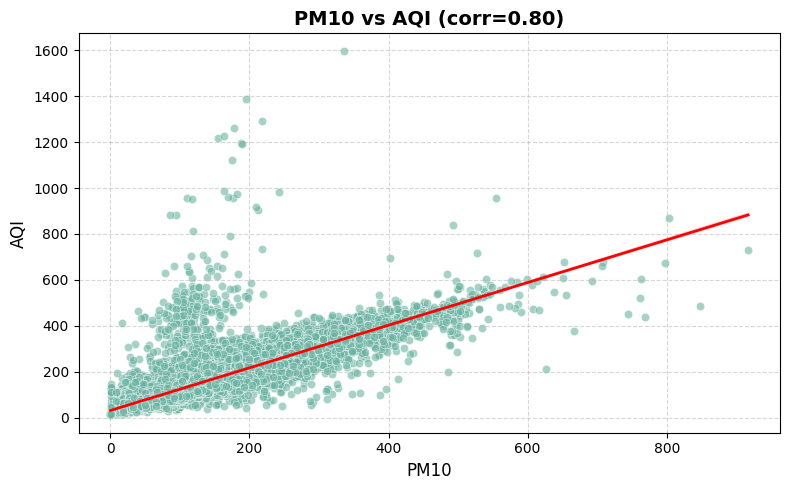

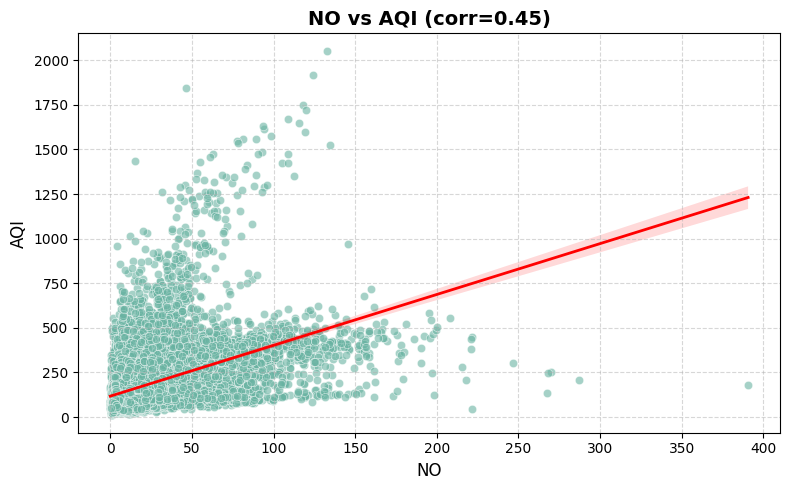

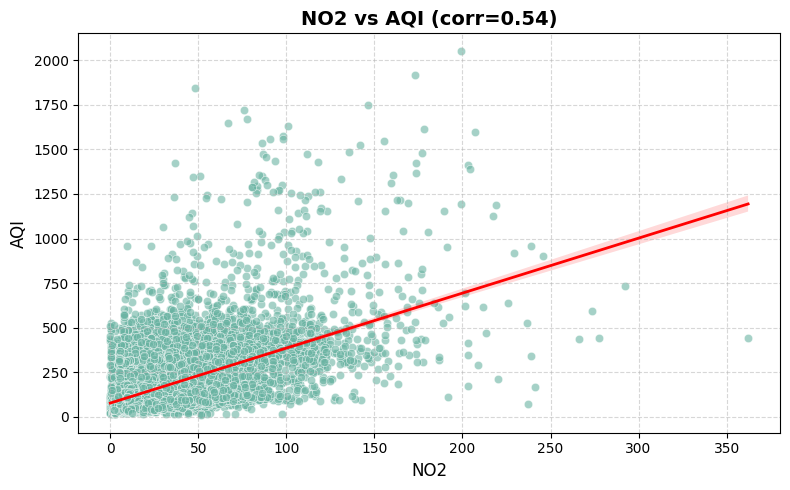

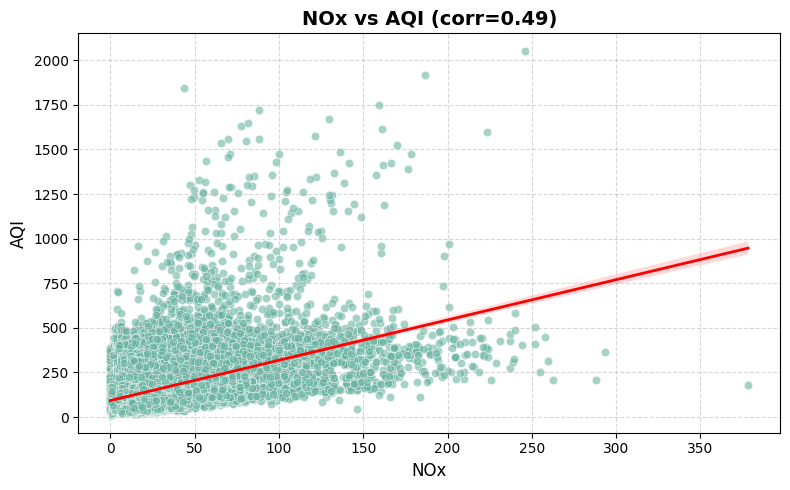

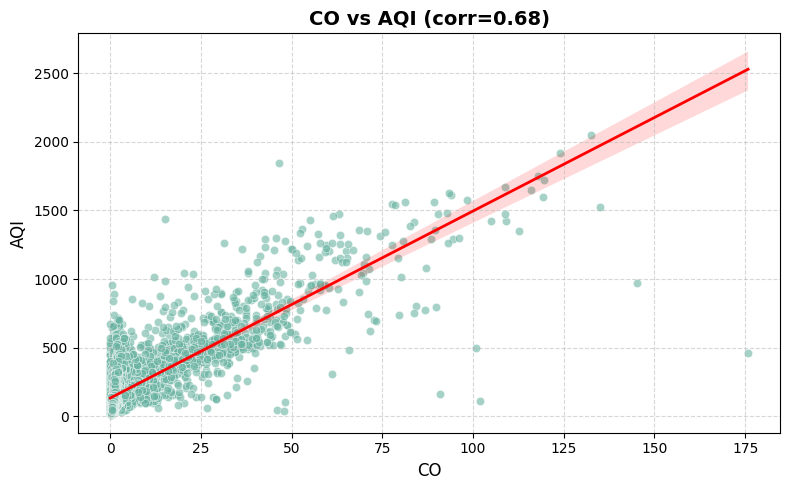

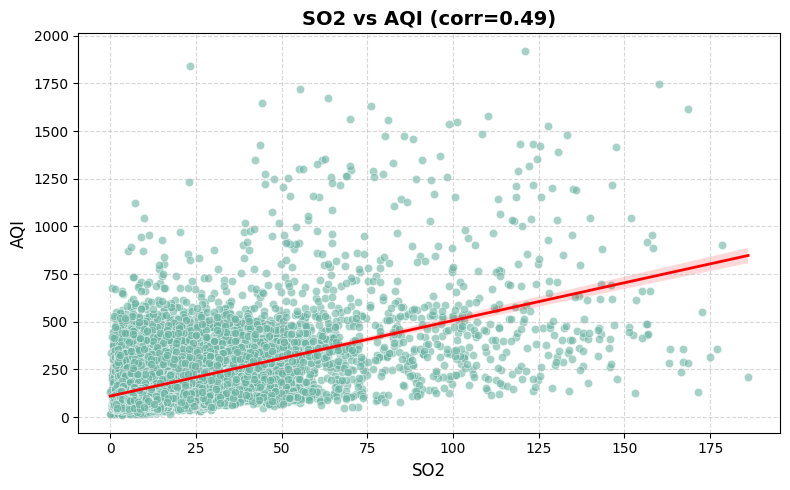

In [ ]:
corr_with_aqi = df[pollutants + ['AQI']].corr()['AQI'].drop('AQI')

for col in pollutants:
    corr_value = corr_with_aqi[col]

    if abs(corr_value) >= threshold:
        plt.figure(figsize=(8,5))

        # Plotting a scatter plot with target variable
        sns.scatterplot(x=col, y='AQI', data=df, alpha=0.6, color='#69b3a2')

        # Plotting a regplot which fits the best line on the graphs
        sns.regplot(x=col, y='AQI', data=df, scatter=False, color='red', line_kws={'linewidth':2})

        plt.title(f'{col} vs AQI (corr={corr_value:.2f})', fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('AQI', fontsize=12)

        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

- Particulate matter (PM10 and PM2.5) and CO are the major contributors to air pollution and have the strongest impact on AQI.
- In contrast, gases like SO₂, NOₓ, NO₂, and NO show moderate influence, suggesting their role is secondary but still significant.

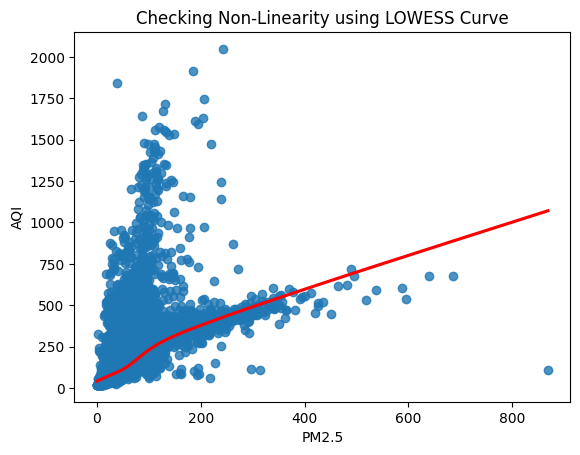

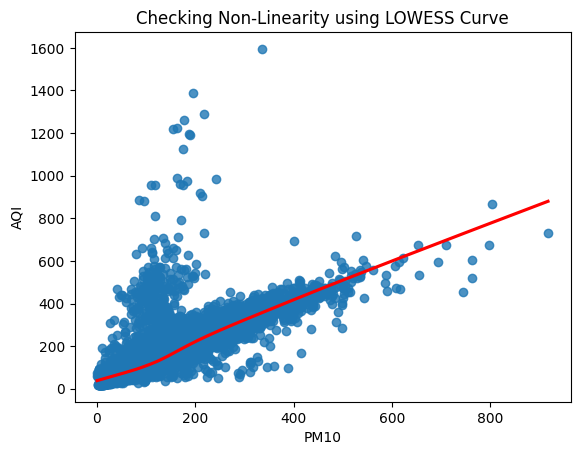

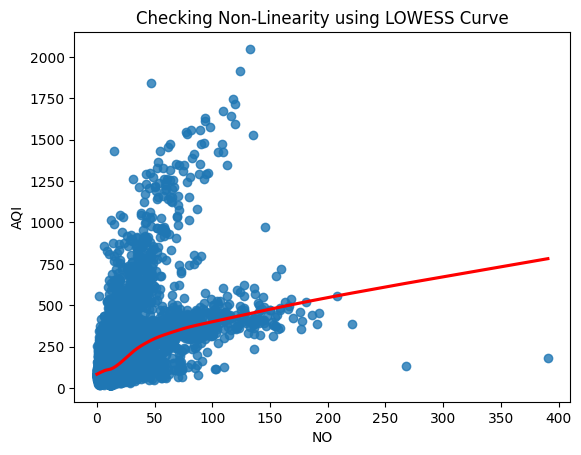

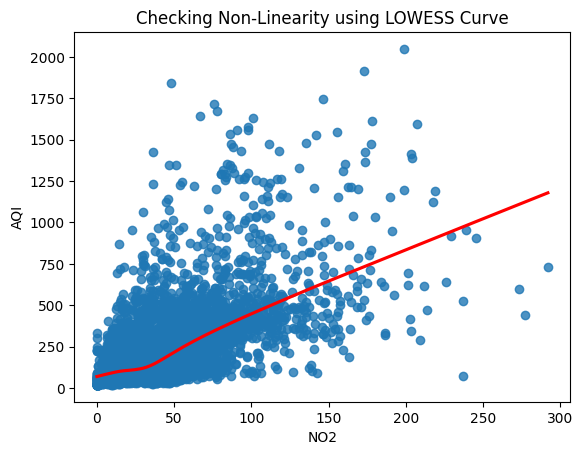

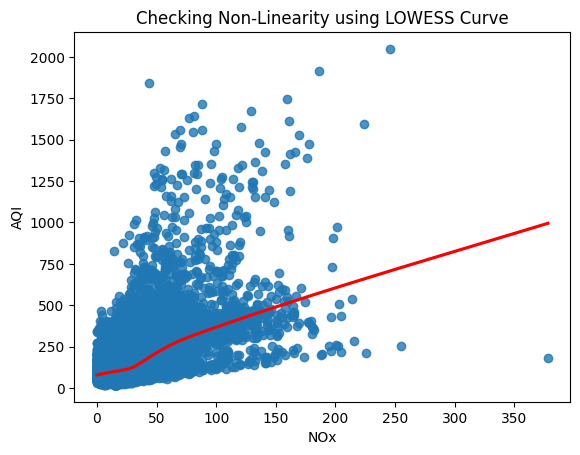

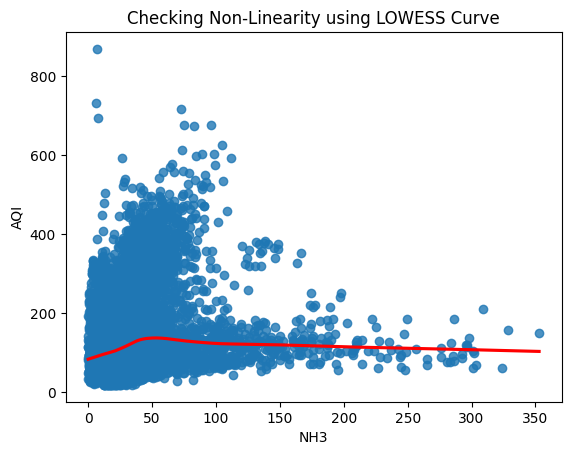

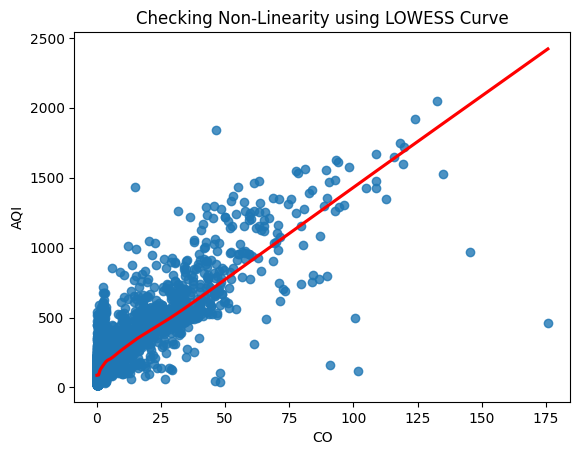

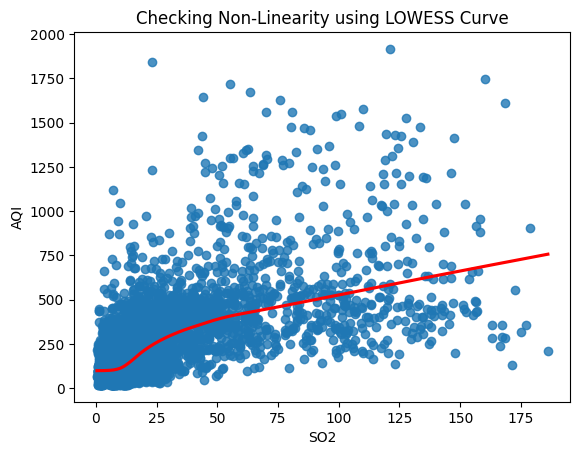

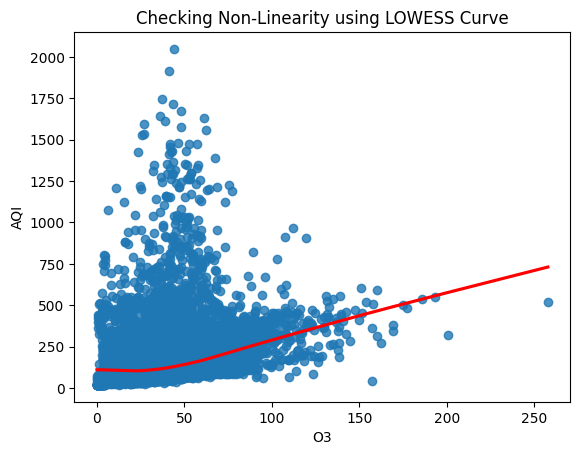

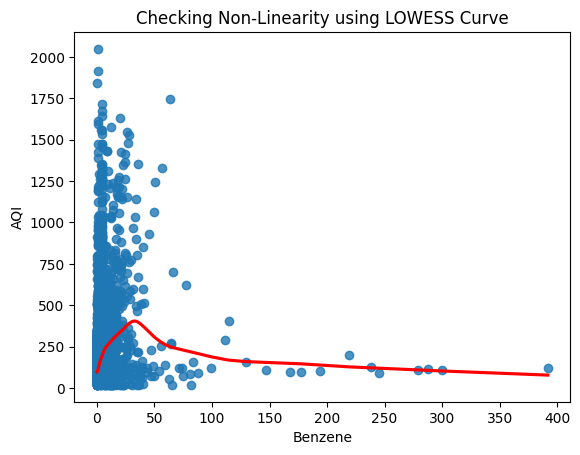

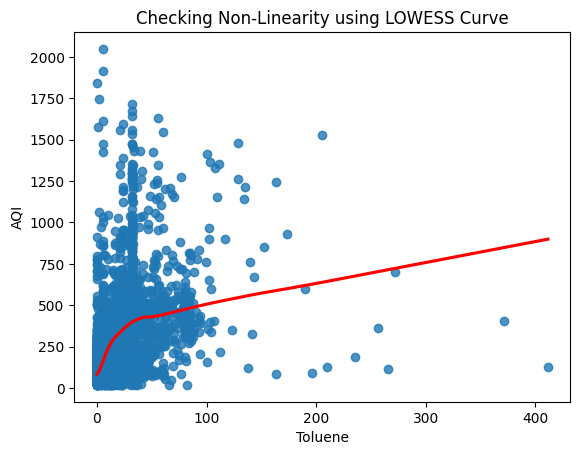

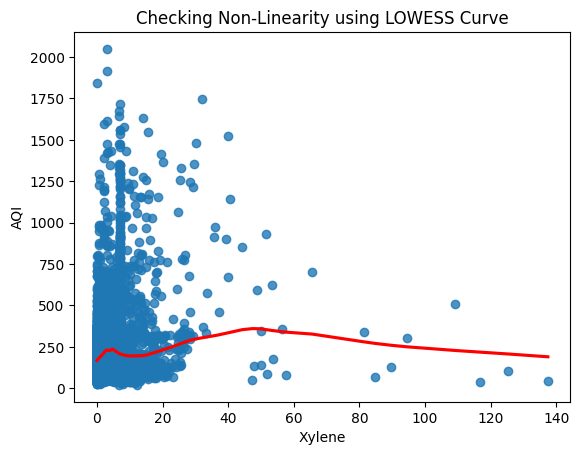

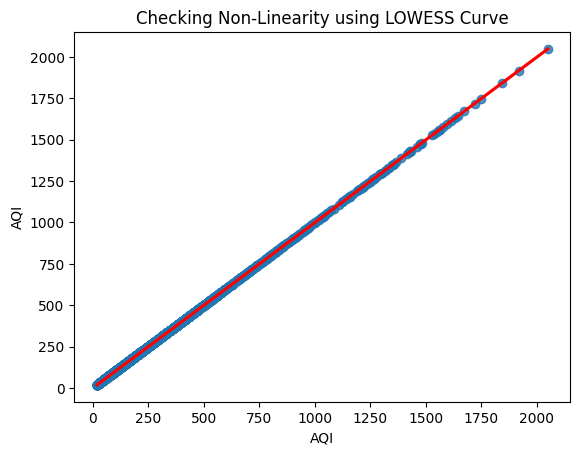

In [7]:
for col in df.columns:
  sns.regplot(x=df[col], y=df['AQI'], lowess=True, line_kws={'color': 'red'})
  plt.title("Checking Non-Linearity using LOWESS Curve")
  plt.show()

- Most of the features are linear
- some features like Xylene , Toulene , Benxen are slightly non-linear

## Multivariate Analysis

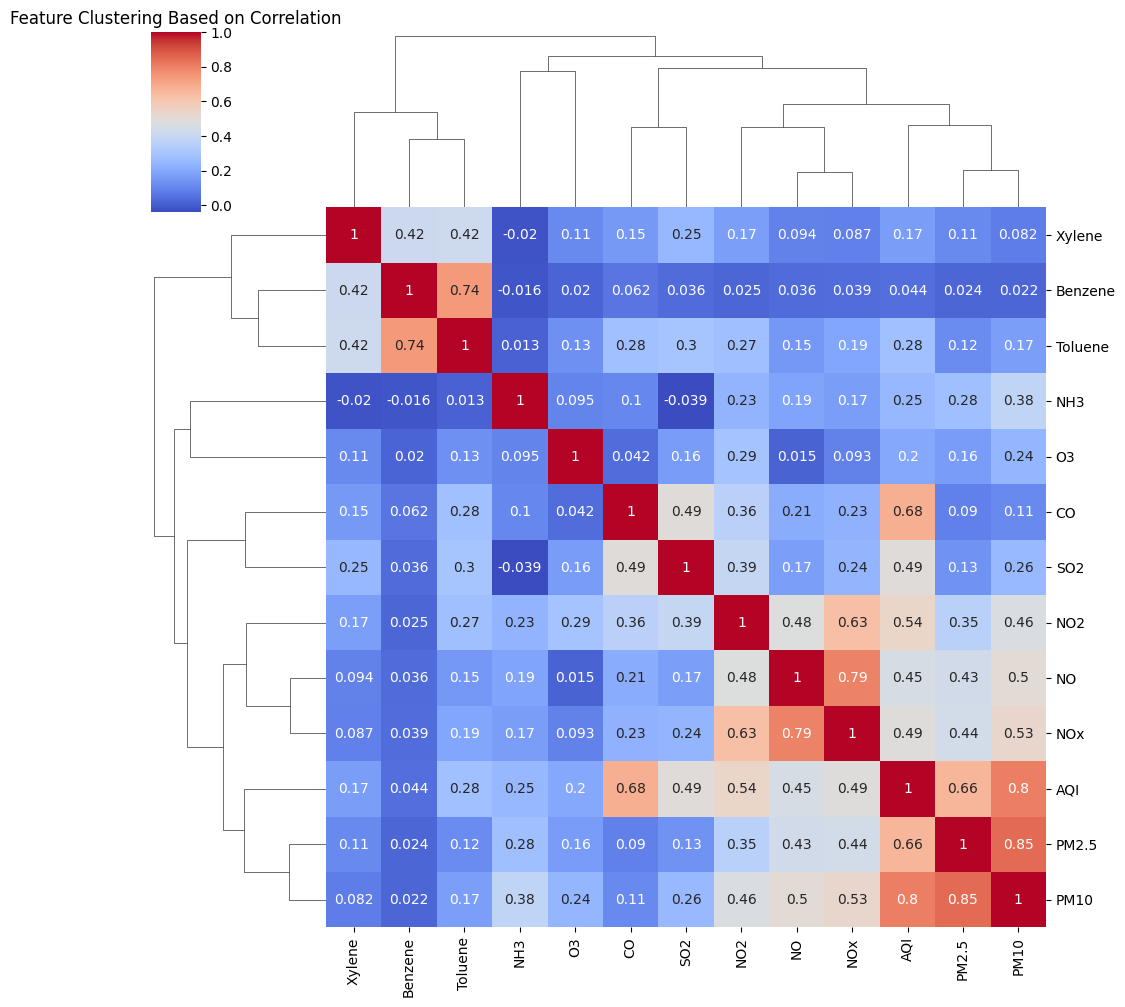

In [ ]:
# Plotting a heatmap to find the correlation among various features
sns.clustermap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Clustering Based on Correlation")
plt.show()


- AQI shows a strong correlation with PM2.5 and PM10.
- NO, NO₂, and NOx form a closely related pollution cluster.
- Benzene, Toluene, and Xylene are also highly interrelated.


# Train test split

In [12]:
numerical_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
target_col = 'AQI'

df = df.dropna(subset=['AQI'])

# Splitting features as X(input) and y(target) features
X = df[numerical_cols]
y = df[target_col]

# Splitting data into train and test in 80% and 20% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outlier Removal

In [13]:
def capping_outliers(X, cols):
    X = pd.DataFrame(X, columns=numerical_cols)

    for col in cols:
        Q1 = X[col].quantile(0.25) # finding 25th percentile
        Q3 = X[col].quantile(0.75) # finding 75th percentile
        IQR = Q3 - Q1 # finding iqr
        lower_bound = Q1 - 1.5 * IQR  # finding the upper bound
        upper_bound = Q3 + 1.5 * IQR  # finding the lower bound

        # Cap values at lower and upper bounds
        X[col] = np.where(
            X[col] < lower_bound, # if value is less than lower bound replace it with lower bound
            lower_bound,

            np.where(
                X[col] > upper_bound, # if value is greater than upper bound replace it with upper bound
                upper_bound,
                X[col]
            )
        )

    return X.values # return capped dataset

In [14]:
# Wrap your function into a transformer
outlier_transformer = FunctionTransformer(capping_outliers, kw_args={'cols': numerical_cols})

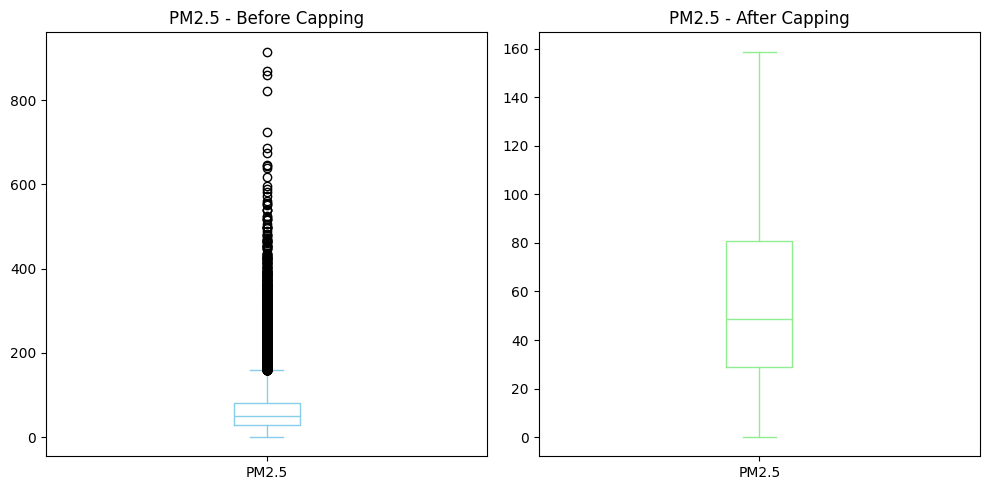

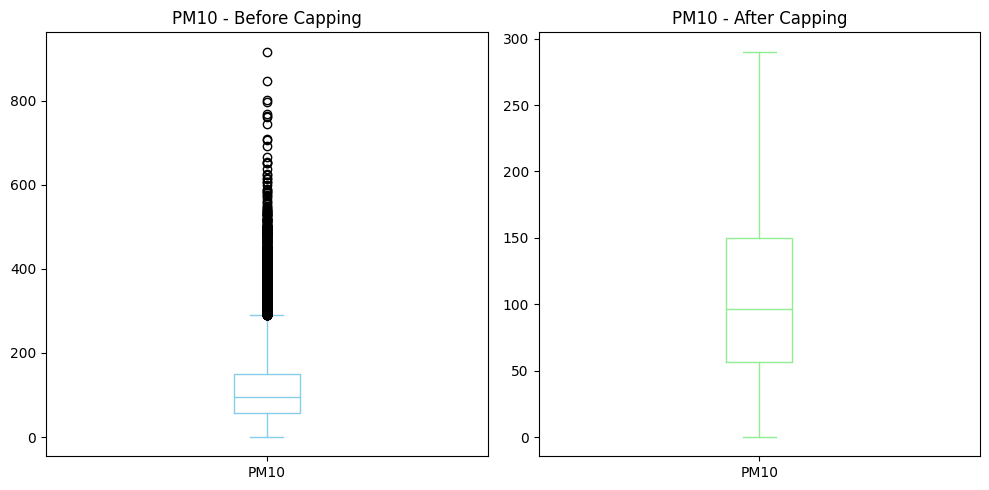

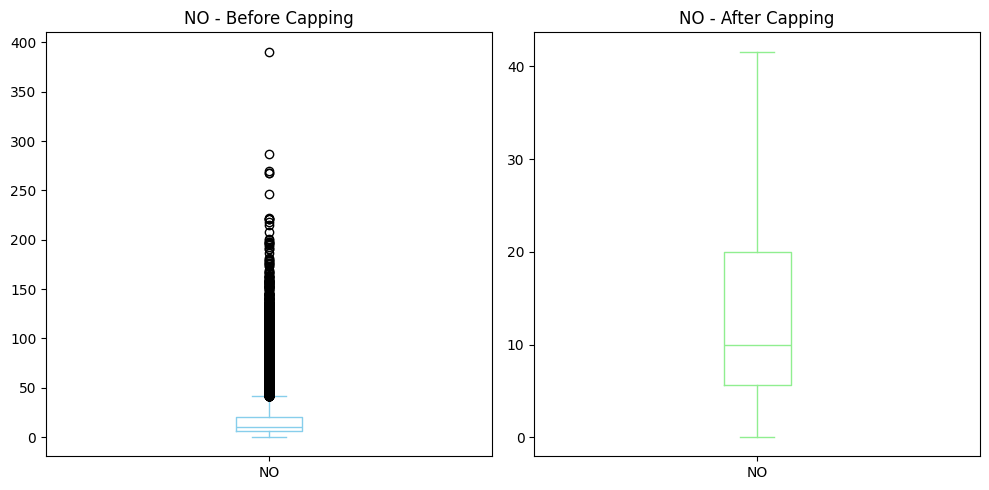

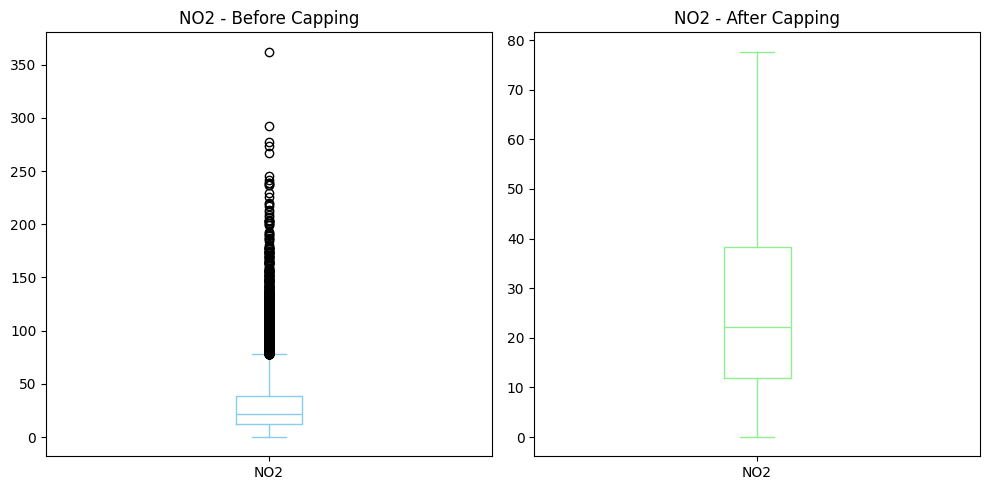

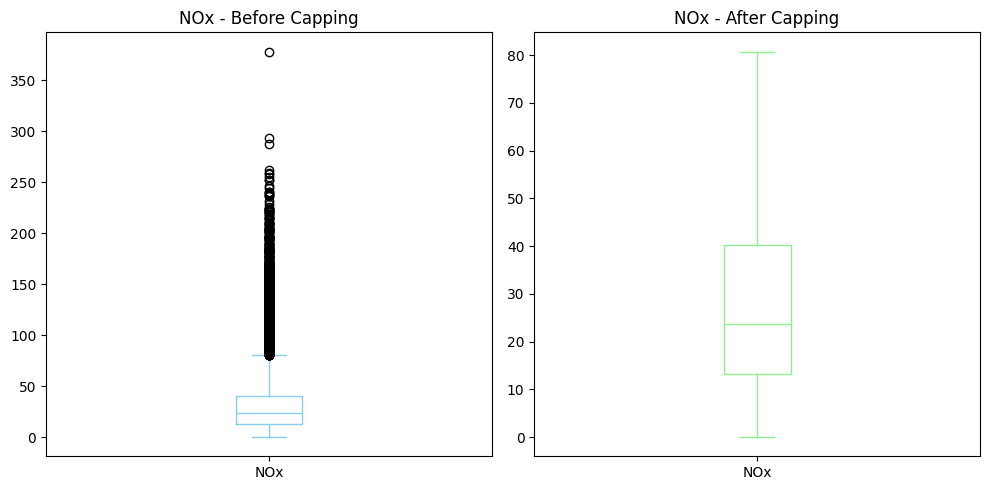

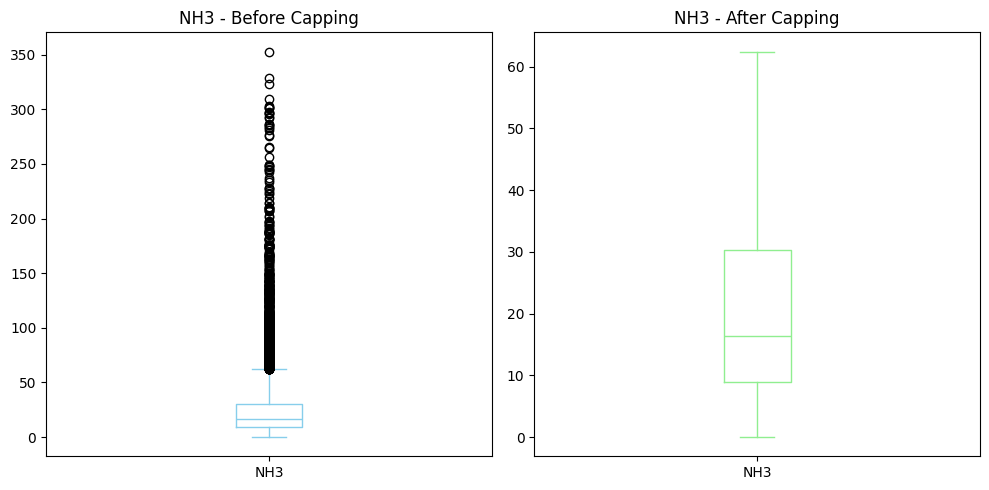

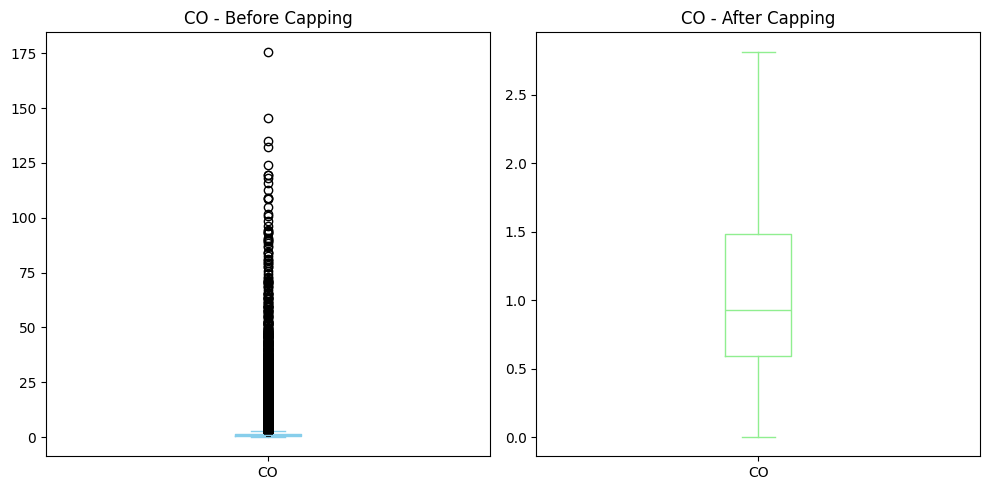

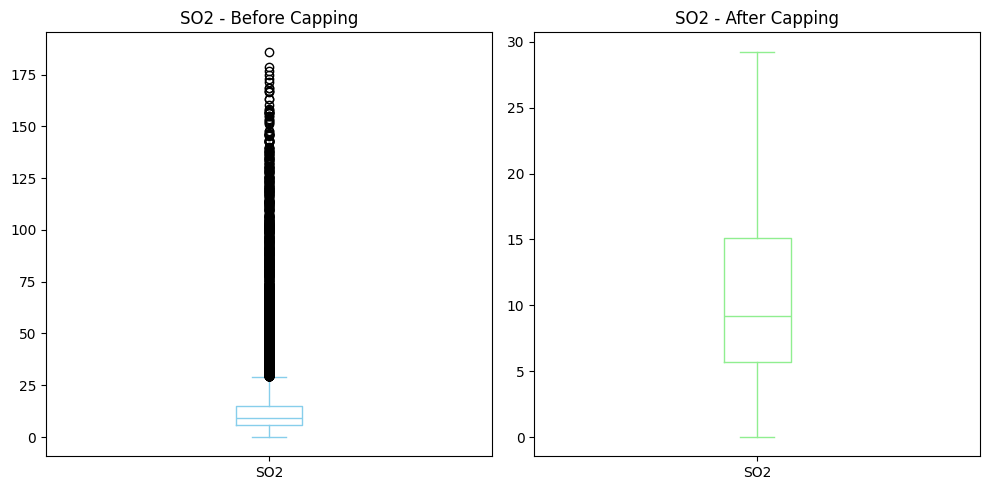

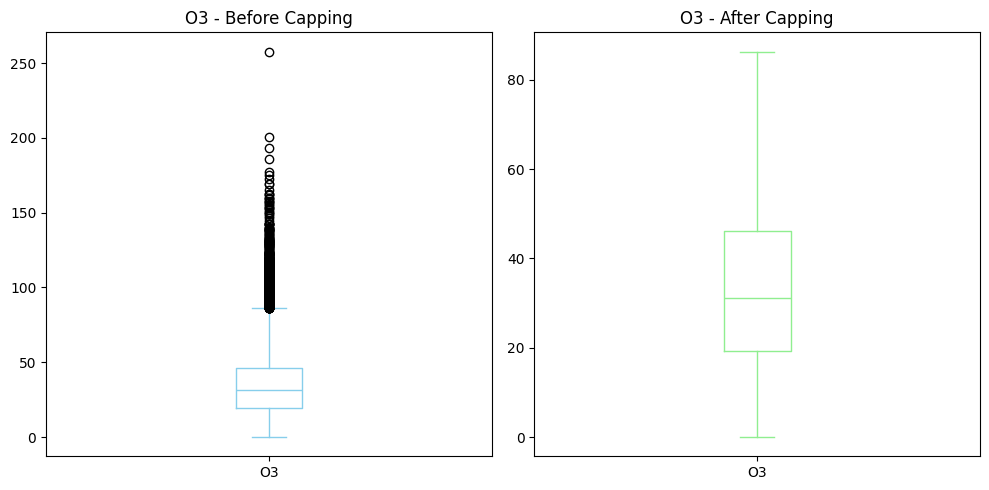

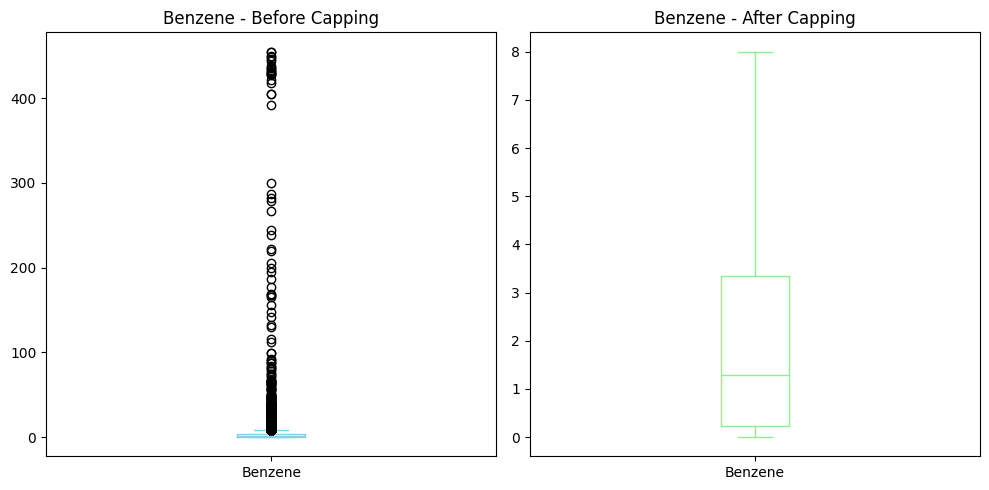

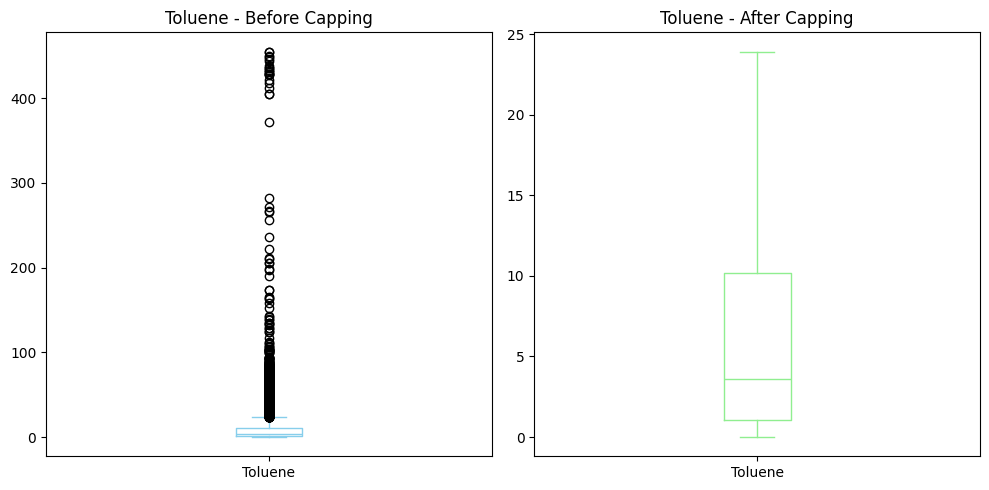

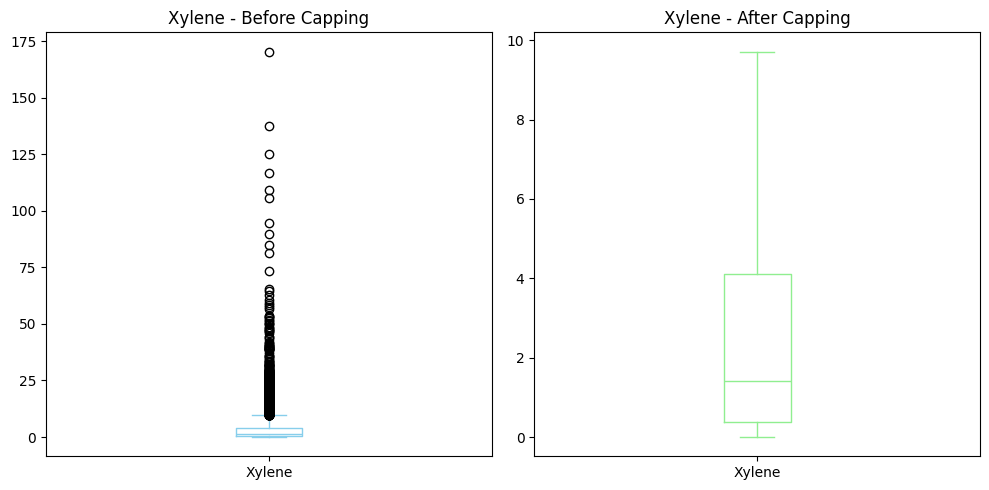

In [ ]:
new_df = df.copy()
new_df = capping_outliers(X, numerical_cols)

new_df = pd.DataFrame(new_df, columns=numerical_cols)

# Boxplot comparison
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), squeeze=False)
    axes = axes.flatten()

    # Before Capping
    df[col].plot(kind='box', ax=axes[0], color='skyblue')
    axes[0].set_title(f"{col} - Before Capping")

    # After Capping
    new_df[col].plot(kind='box', ax=axes[1], color='lightgreen')
    axes[1].set_title(f"{col} - After Capping")

    plt.tight_layout()
    plt.show()

# Linear Regerssion

In [ ]:
# Build a pipeline
numeric_transformer_lr = Pipeline(steps=[
    ('imputer', KNNImputer()), # filling missing value using KNN algorithm
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # Create non-linear features
    ('scaler', StandardScaler()), # Scale data so any feature will not dominate in predicting AQI
])

In [ ]:
# Create a transformer for linear regression
preprocessor_lr = ColumnTransformer([
    ('num', numeric_transformer_lr, numerical_cols)
])

In [ ]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),  # ColumnTransformer pipeline
    ('regressor', Ridge()) # Many features are giving same information to the model which results in multicollinearity Rigid shrinks them to reduce overfitting and multicollinearity
])

In [ ]:
param_grid_ridge = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 50, 100],
    'regressor__fit_intercept': [True, False]
}

grid = GridSearchCV(pipeline_lr, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [ ]:
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

cv_results = cross_validate(best_model, X_train, y_train, cv=5, scoring=scoring) # Revalidate using cross validation

print("Best hyperparameters found by GridSearchCV:")
print(grid.best_params_)

# Convert negatives to positive for MAE and MSE
mae_mean = -cv_results['test_mae'].mean()
mse_mean = -cv_results['test_mse'].mean()
rmse_mean = np.sqrt(mse_mean)
r2_mean = cv_results['test_r2'].mean()

print(f"Mean R²: {r2_mean:.4f}") # Printing R2 Score
print(f"Mean MAE: {mae_mean:.4f}") # Print MAE
print(f"Mean RMSE: {rmse_mean:.4f}") # Print RMSE

Best hyperparameters found by GridSearchCV:
{'regressor__alpha': 10, 'regressor__fit_intercept': True}
Mean R²: 0.8793
Mean MAE: 26.9421
Mean RMSE: 49.2790


# Decision Tree

In [ ]:
numeric_transformer_dt = Pipeline(steps=[
    ('imputer', KNNImputer()), # filling missing value using KNN algorithm
])

In [ ]:
preprocessor_dt = ColumnTransformer([
    ('num', numeric_transformer_dt, numerical_cols)
])

In [ ]:
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_dt),  # your ColumnTransformer pipeline
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [ ]:
# Hyperparameter grid for Decision Tree Regressor
param_grid_dt = {
    'regressor__max_depth': [5, 10, None],           # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'regressor__min_samples_leaf': [1, 2, 5],        # Minimum samples required in a leaf node
    'regressor__max_features': [None, 'sqrt', 'log2']# Number of features to consider at each split
}

In [ ]:
grid_dt = GridSearchCV(
    pipeline_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

In [ ]:
grid_dt.fit(X_train, y_train)

print("Best parameters:", grid_dt.best_params_)

best_dt = grid_dt.best_estimator_

Best parameters: {'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 2}


In [ ]:
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

cv_results = cross_validate(best_dt, X_train, y_train, cv=5, scoring=scoring)

# Convert negative MAE and MSE to positive
mae_mean = -cv_results['test_mae'].mean()
mse_mean = -cv_results['test_mse'].mean()
rmse_mean = np.sqrt(mse_mean)
r2_mean = cv_results['test_r2'].mean()

# Print nicely
print(f"Cross-validated Metrics (5-fold):")
print(f"R²   : {r2_mean:.4f}")
print(f"MAE  : {mae_mean:.4f}")
print(f"MSE  : {mse_mean:.4f}")
print(f"RMSE : {rmse_mean:.4f}")

Cross-validated Metrics (5-fold):
R²   : 0.8729
MAE  : 25.2772
MSE  : 2562.4699
RMSE : 50.6208


# Random Forest

In [ ]:
numeric_transformer_rf = Pipeline(steps=[
    ('imputer', KNNImputer()),
])

In [ ]:
preprocessor_rf = ColumnTransformer([
    ('num', numeric_transformer_rf, numerical_cols)
])

In [ ]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),  # ColumnTransformer pipeline
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

# Cross-validation
cv_results = cross_validate(pipeline_rf, X_train, y_train, cv=5, scoring=scoring)

# Convert negatives
mae_mean = -cv_results['test_mae'].mean()
mse_mean = -cv_results['test_mse'].mean()
rmse_mean = np.sqrt(mse_mean)
r2_mean = cv_results['test_r2'].mean()

# Print nicely
print(f"Random Forest CV Metrics (5-fold):")
print(f"R²   : {r2_mean:.4f}")
print(f"MAE  : {mae_mean:.4f}")
print(f"MSE  : {mse_mean:.4f}")
print(f"RMSE : {rmse_mean:.4f}")

Random Forest CV Metrics (5-fold):
R²   : 0.9023
MAE  : 21.6156
MSE  : 1967.4469
RMSE : 44.3559


# K Nearest Neighboors

In [ ]:
# Numeric preprocessing for KNN
numeric_transformer_knn = Pipeline(steps=[
    ('imputer', KNNImputer()),              # Fill missing values
    ('cap_outliers', outlier_transformer),  # Handle outliers
    ('scaler', StandardScaler())            # Standardize features for distance-based model
])

In [ ]:
preprocessor_knn = ColumnTransformer([
    ('num', numeric_transformer_knn, numerical_cols)
])

In [ ]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_knn),  # ColumnTransformer pipeline
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

In [ ]:
# Hyperparameter grid for K-Nearest Neighbors (KNN)
param_grid_knn = {
    'regressor__n_neighbors': [3, 5, 7, 10, 15],   # Number of nearest neighbors to use
    'regressor__weights': ['uniform', 'distance'], # Weighting method for neighbors
    'regressor__p': [1, 2]                         # Distance metric: 1 = Manhattan, 2 = Euclidean
}

In [ ]:
grid_knn = GridSearchCV(
    pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

In [ ]:
grid_knn.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_knn.best_params_)

# Cross-validated R² using best estimator
best_knn = grid_knn.best_estimator_

Best parameters: {'regressor__n_neighbors': 7, 'regressor__p': 2, 'regressor__weights': 'distance'}


In [ ]:
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

cv_results = cross_validate(best_knn, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

r2_mean = cv_results['test_r2'].mean()
mae_mean = -cv_results['test_mae'].mean()
mse_mean = -cv_results['test_mse'].mean()
rmse_mean = np.sqrt(mse_mean)

print(f"KNN CV Metrics (5-fold):")
print(f"R²   : {r2_mean:.4f}")
print(f"MAE  : {mae_mean:.4f}")
print(f"MSE  : {mse_mean:.4f}")
print(f"RMSE : {rmse_mean:.4f}")

KNN CV Metrics (5-fold):
R²   : 0.8809
MAE  : 23.8846
MSE  : 2401.6280
RMSE : 49.0064


# XGBoost

In [ ]:
numeric_transformer_xgb = Pipeline(steps=[
    ('imputer', KNNImputer()),
])

In [ ]:
preprocessor_xgb = ColumnTransformer([
    ('num', numeric_transformer_xgb, numerical_cols)
])

In [ ]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),  # ColumnTransformer pipeline
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

In [ ]:
# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'regressor__n_estimators': [100, 200],        # Number of trees
    'regressor__max_depth': [3, 5],               # Tree depth (controls model complexity)
    'regressor__learning_rate': [0.01, 0.05],     # Step size for weight updates
    'regressor__subsample': [0.6, 0.8],           # Fraction of data used per tree
    'regressor__colsample_bytree': [0.6, 0.8],    # Fraction of features used per tree
    'regressor__min_child_weight': [1, 3]         # Minimum weight in a child node (controls overfitting)
}

In [ ]:
# Grid search for XGBoost model
grid_xgb = GridSearchCV(
    pipeline_xgb,         # Pipeline containing preprocessing + model
    param_grid=param_grid_xgb,  # Parameter grid to test
    cv=5,                 # 5-fold cross-validation
    scoring='r2',         # Use R² score to evaluate performance
    n_jobs=-1             # Use all CPU cores for faster computation
)

In [ ]:
grid_xgb.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_xgb.best_params_)

# Cross-validated R² using best estimator
best_xgb = grid_xgb.best_estimator_

Best parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__min_child_weight': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.6}


In [ ]:
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

cv_results = cross_validate(best_xgb , X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

r2_mean = cv_results['test_r2'].mean()
mae_mean = -cv_results['test_mae'].mean()
mse_mean = -cv_results['test_mse'].mean()
rmse_mean = np.sqrt(mse_mean)

print(f"KNN CV Metrics (5-fold):")
print(f"R²   : {r2_mean:.4f}")
print(f"MAE  : {mae_mean:.4f}")
print(f"MSE  : {mse_mean:.4f}")
print(f"RMSE : {rmse_mean:.4f}")

KNN CV Metrics (5-fold):
R²   : 0.9033
MAE  : 22.3770
MSE  : 1945.7498
RMSE : 44.1107


# ANN

In [15]:
# Numeric preprocessing for ANN
numeric_transformer_ann = Pipeline(steps=[
    ('imputer', KNNImputer()),              # Fill missing values
    ('cap_outliers', outlier_transformer),  # Handle outliers
    ('power', PowerTransformer()),          # Reduce skewness
    ('scaler', StandardScaler())            # Normalize features
])

In [16]:
preprocessor_ann = ColumnTransformer([
    ('num', numeric_transformer_ann, numerical_cols)
])

In [17]:
pipeline_ann = Pipeline(steps=[
    ('preprocessor', preprocessor_ann),  # your ColumnTransformer pipeline
    ('ann', MLPRegressor(hidden_layer_sizes=(64, 32),  # 2 hidden layers
                         activation='relu',           # common for regression
                         solver='adam',              # optimizer
                         learning_rate_init=0.001,
                         max_iter=5000,
                         random_state=42))
])

In [18]:
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

cv_results = cross_validate(pipeline_ann, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

r2_mean = cv_results['test_r2'].mean()
mae_mean = -cv_results['test_mae'].mean()
mse_mean = -cv_results['test_mse'].mean()
rmse_mean = np.sqrt(mse_mean)

print(f"ANN CV Metrics (5-fold):")
print(f"R²   : {r2_mean:.4f}")
print(f"MAE  : {mae_mean:.4f}")
print(f"MSE  : {mse_mean:.4f}")
print(f"RMSE : {rmse_mean:.4f}")

ANN CV Metrics (5-fold):
R²   : 0.8529
MAE  : 32.9656
MSE  : 4580.0091
RMSE : 67.6758


# Exporting Model as pkl file

In [ ]:
joblib.dump(best_xgb , "best_model.pkl")
print("Model saved as best_model.pkl")

Model saved as best_model.pkl


In [ ]:
# Load the saved model
loaded_model = joblib.load("best_model.pkl")

# Predict on test data
y_pred = loaded_model.predict(X_test)

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Metrics on Loaded Model:")
print(f"R²   : {r2:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")


Metrics on Loaded Model:
R²   : 0.8933
MAE  : 22.7878
MSE  : 1954.5112
RMSE : 44.2099
